# Molset
A Molset is an organized collection of computationally tractable compounds, that is compounds with structural information.

It is inizialized with a list of strings representing molecules in any of the most common formats (i.e. InChI, SMILES, InChIKeys and compound name).

All the missing identifiers are calculated on the fly.

In [1]:
import os
import numpy as np
import pandas as pd
from collections import defaultdict

from chemicalchecker import ChemicalChecker
from chemicalchecker.core import Molset, DataSignature

In [2]:
cc = ChemicalChecker()
cc.set_verbosity('INFO')

[INFO    ] Logging level INFO for logger 'chemicalchecker'.


## Initialization
Producing a DataFrame annotated with all the basic identifiers and the structure representation.

### By Compound names

[15:51:53] SMILES Parse Error: syntax error while parsing: Aspirin
[15:51:53] SMILES Parse Error: Failed parsing SMILES 'Aspirin' for input: 'Aspirin'
[WARNING ] Molecule 'Aspirin' not recognized as either 'inchikey', 'inchi' or 'smiles'. Considering type as 'name'.
[INFO    ] 4 unique molecules provided
getting Name-InChI map: 100%|█████████████████████████████████████████████| 4/4 [00:03<00:00,  1.15it/s]


,Name,InChIKey,InChI,SMILES,Scaffold,Structure
0,Aspirin,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,c1ccccc1,
1,Hydrocortisone,JYGXADMDTFJGBT-VWUMJDOOSA-N,InChI=1S/C21H30O5/c1-19-7-5-13(23)9-12(19)3-4-...,C[C@]12C[C@H](O)[C@H]3[C@@H](CCC4=CC(=O)CC[C@@...,O=C1C=C2CCC3C4CCCC4CCC3C2CC1,
2,Lovastatin,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,O=C1CCCC(CCC2CC=CC3=CCCCC32)O1,
3,Xanthomegnin,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,O=C1OCCc2cc3c(cc21)C(=O)C(C1=CC(=O)c2cc4c(cc2C...,

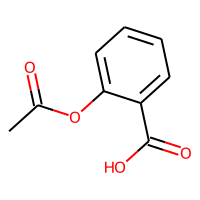
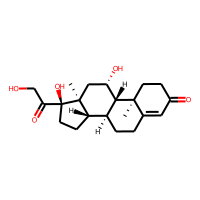
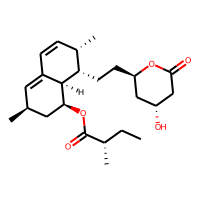
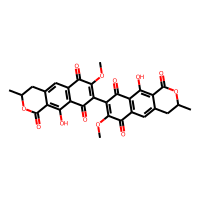

In [4]:
molecules = ['Aspirin','Lovastatin','Xanthomegnin', 'Hydrocortisone']
molset = Molset(cc, molecules)
molset.df

### By SMILES

[INFO    ] 4 unique molecules provided


,InChIKey,InChI,SMILES,Scaffold,Structure
0,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,c1ccccc1,
1,JYGXADMDTFJGBT-VWUMJDOOSA-N,InChI=1S/C21H30O5/c1-19-7-5-13(23)9-12(19)3-4-...,C[C@]12C[C@H](O)[C@H]3[C@@H](CCC4=CC(=O)CC[C@@...,O=C1C=C2CCC3C4CCCC4CCC3C2CC1,
2,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,O=C1CCCC(CCC2CC=CC3=CCCCC32)O1,
3,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,O=C1OCCc2cc3c(cc21)C(=O)C(C1=CC(=O)c2cc4c(cc2C...,

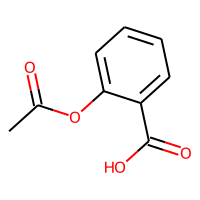
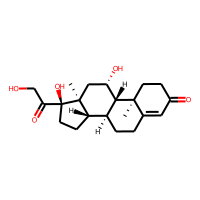
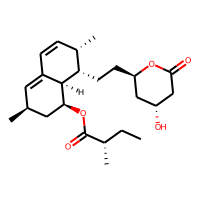
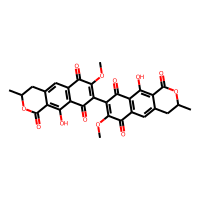

In [6]:
molecules = [
    'CC(=O)Oc1ccccc1C(=O)O',
    'C[C@]12C[C@H](O)[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C@@H]1CC[C@]2(O)C(=O)CO',
    'CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)[C@H](CC[C@@H]3C[C@@H](O)CC(=O)O3)[C@H]21',
    'COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)Cc2c3)C(=O)c2c(cc3CC(C)OC(=O)c3c2O)C1=O']
molset = Molset(cc, molecules)
molset.df

### By InChI

[INFO    ] 4 unique molecules provided


,InChIKey,InChI,SMILES,Scaffold,Structure
0,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,c1ccccc1,
1,JYGXADMDTFJGBT-VWUMJDOOSA-N,InChI=1S/C21H30O5/c1-19-7-5-13(23)9-12(19)3-4-...,C[C@]12C[C@H](O)[C@H]3[C@@H](CCC4=CC(=O)CC[C@@...,O=C1C=C2CCC3C4CCCC4CCC3C2CC1,
2,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,O=C1CCCC(CCC2CC=CC3=CCCCC32)O1,
3,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,O=C1OCCc2cc3c(cc21)C(=O)C(C1=CC(=O)c2cc4c(cc2C...,

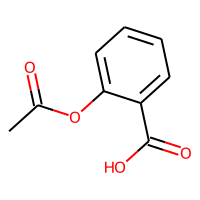
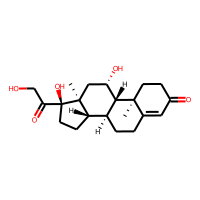
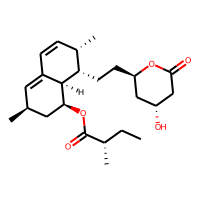
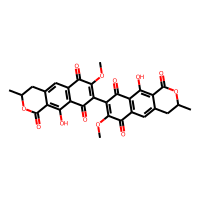

In [8]:
molecules = [
    'InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)12/h2-5H,1H3,(H,11,12)',
    'InChI=1S/C21H30O5/c1-19-7-5-13(23)9-12(19)3-4-14-15-6-8-21(26,17(25)11-22)20(15,2)10-16(24)18(14)19/h9,14-16,18,22,24,26H,3-8,10-11H2,1-2H3/t14-,15-,16-,18+,19-,20-,21-/m0/s1',
    'InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(2)10-17-7-6-16(4)20(23(17)21)9-8-19-12-18(25)13-22(26)28-19/h6-7,10,14-16,18-21,23,25H,5,8-9,11-13H2,1-4H3/t14-,15-,16-,18+,19+,20-,21-,23-/m0/s1',
    'InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(11)29(37)41-9)25(35)19(27(39-3)21(13)31)20-26(36)18-14(22(32)28(20)40-4)8-12-6-10(2)42-30(38)16(12)24(18)34/h7-10,33-34H,5-6H2,1-4H3']
molset = Molset(cc, molecules)
molset.df

### By InChIKeys

[INFO    ] 4 unique molecules provided
getting InChIKey-InChI map: 100%|█████████████████████████████████████████| 4/4 [00:00<00:00,  4.11it/s]


,InChIKey,InChI,SMILES,Scaffold,Structure
0,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,c1ccccc1,
1,JYGXADMDTFJGBT-VWUMJDOOSA-N,InChI=1S/C21H30O5/c1-19-7-5-13(23)9-12(19)3-4-...,C[C@]12C[C@H](O)[C@H]3[C@@H](CCC4=CC(=O)CC[C@@...,O=C1C=C2CCC3C4CCCC4CCC3C2CC1,
2,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,O=C1CCCC(CCC2CC=CC3=CCCCC32)O1,
3,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,O=C1OCCc2cc3c(cc21)C(=O)C(C1=CC(=O)c2cc4c(cc2C...,

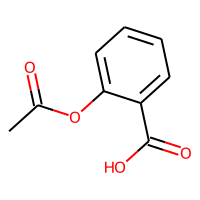
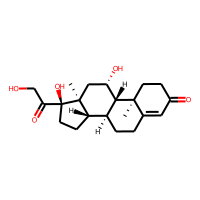
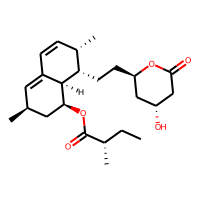
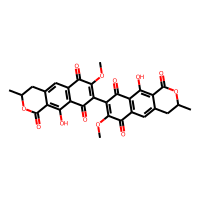

In [10]:
molecules = [
    'BSYNRYMUTXBXSQ-UHFFFAOYSA-N',
    'JYGXADMDTFJGBT-VWUMJDOOSA-N',
    'PCZOHLXUXFIOCF-BXMDZJJMSA-N',
    'WICHONPZVIYWIJ-UHFFFAOYSA-N']
molset = Molset(cc, molecules)
molset.df

## Annotation

### Presence in the CC
Molecules can be easily annotated for presence in any of the CC spaces

[INFO    ] 3/4 molecules found in A1.001
[INFO    ] 2/4 molecules found in A2.001
[INFO    ] 3/4 molecules found in A3.001
[INFO    ] 3/4 molecules found in A4.001
[INFO    ] 3/4 molecules found in A5.001
[INFO    ] 3/4 molecules found in B1.001
[INFO    ] 3/4 molecules found in B2.001
[INFO    ] 3/4 molecules found in B3.001
[INFO    ] 3/4 molecules found in B4.001
[INFO    ] 3/4 molecules found in B5.001
[INFO    ] 3/4 molecules found in C1.001
[INFO    ] 2/4 molecules found in C2.001
[INFO    ] 3/4 molecules found in C3.001
[INFO    ] 3/4 molecules found in C4.001
[INFO    ] 3/4 molecules found in C5.001
[INFO    ] 1/4 molecules found in D1.001
[INFO    ] 2/4 molecules found in D2.001
[INFO    ] 1/4 molecules found in D3.001
[INFO    ] 1/4 molecules found in D4.001
[INFO    ] 1/4 molecules found in D5.001
[INFO    ] 3/4 molecules found in E1.001
[INFO    ] 3/4 molecules found in E2.001
[INFO    ] 1/4 molecules found in E3.001
[INFO    ] 1/4 molecules found in E4.001
[INFO    ] 3/4 m

,InChIKey,InChI,SMILES,Scaffold,Structure,A1,A2,A3,A4,A5,...,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5
0,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,c1ccccc1,,1,1,1,1,1,...,0,0,0,0,0,1,1,1,1,1
1,JYGXADMDTFJGBT-VWUMJDOOSA-N,InChI=1S/C21H30O5/c1-19-7-5-13(23)9-12(19)3-4-...,C[C@]12C[C@H](O)[C@H]3[C@@H](CCC4=CC(=O)CC[C@@...,O=C1C=C2CCC3C4CCCC4CCC3C2CC1,,1,1,1,1,1,...,1,1,0,0,0,1,1,0,0,1
2,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,O=C1CCCC(CCC2CC=CC3=CCCCC32)O1,,1,0,1,1,1,...,0,1,1,1,1,1,1,0,0,1
3,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,O=C1OCCc2cc3c(cc21)C(=O)C(C1=CC(=O)c2cc4c(cc2C...,,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0

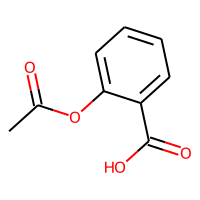
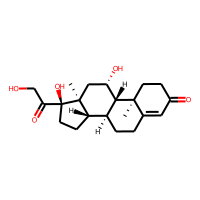
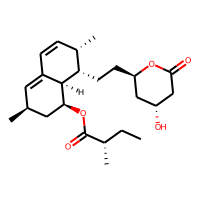
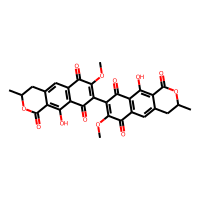

In [11]:
for ds in cc.datasets_exemplary():
    molset.annotate(ds, include_features=False)
molset.df

### Sign0 Features

Each CC space has it's own feature semantic.


In the case of B4 are either protein (Uniprot accession) or protein classes (as from ChEMBL)

Molset offers methods to get feature related mappings, for example if we are only interested in the classes and we want them to be human readable we can do the following

Both sign0 or raw sign0 can be used. Raw sign0 are transformed to sign0 applying the Sanitizer filter.

[INFO    ] 3/4 molecules found in B4.001


,InChIKey,InChI,SMILES,Scaffold,Structure,A1,A2,A3,A4,A5,...,D2,D3,D4,D5,E1,E2,E3,E4,E5,B4_features
0,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,c1ccccc1,,1,1,1,1,1,...,0,0,0,0,1,1,1,1,1,"[Class:0, Class:1, Class:10, Class:645, O62664..."
1,JYGXADMDTFJGBT-VWUMJDOOSA-N,InChI=1S/C21H30O5/c1-19-7-5-13(23)9-12(19)3-4-...,C[C@]12C[C@H](O)[C@H]3[C@@H](CCC4=CC(=O)CC[C@@...,O=C1C=C2CCC3C4CCCC4CCC3C2CC1,,1,1,1,1,1,...,1,0,0,0,1,1,0,0,1,"[Class:0, Class:1033, Class:1043, Class:1167, ..."
2,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,O=C1CCCC(CCC2CC=CC3=CCCCC32)O1,,1,0,1,1,1,...,1,1,1,1,1,1,0,0,1,"[Class:0, Class:1, Class:10, Class:1006, Class..."
3,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,O=C1OCCc2cc3c(cc21)C(=O)C(C1=CC(=O)c2cc4c(cc2C...,,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[]

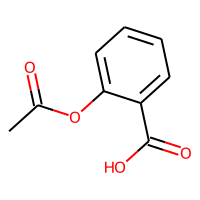
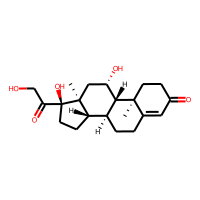
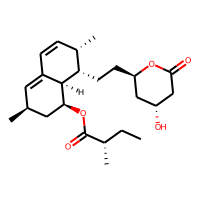
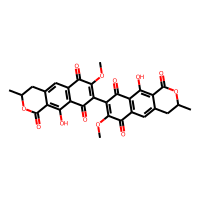

In [12]:
molset.annotate('B4.001', include_features=True, features_from_raw=True)
molset.df

[INFO    ] 3/4 molecules found in B4.001


,InChIKey,InChI,SMILES,Scaffold,Structure,A1,A2,A3,A4,A5,...,D3,D4,D5,E1,E2,E3,E4,E5,B4_features,B4_sign0
0,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,c1ccccc1,,1,1,1,1,1,...,0,0,0,1,1,1,1,1,"[Class:1, Class:10, Class:645, O62664, P05979,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,JYGXADMDTFJGBT-VWUMJDOOSA-N,InChI=1S/C21H30O5/c1-19-7-5-13(23)9-12(19)3-4-...,C[C@]12C[C@H](O)[C@H]3[C@@H](CCC4=CC(=O)CC[C@@...,O=C1C=C2CCC3C4CCCC4CCC3C2CC1,,1,1,1,1,1,...,0,0,0,1,1,0,0,1,"[Class:1033, Class:1043, Class:1167, Class:12,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,O=C1CCCC(CCC2CC=CC3=CCCCC32)O1,,1,0,1,1,1,...,1,1,1,1,1,0,0,1,"[Class:1, Class:10, Class:1006, Class:1027, Cl...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,O=C1OCCc2cc3c(cc21)C(=O)C(C1=CC(=O)c2cc4c(cc2C...,,0,0,0,0,0,...,0,0,0,0,0,0,0,0,[],NaN

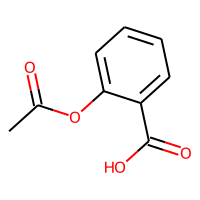
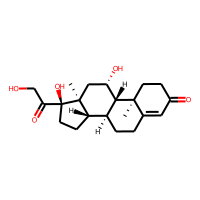
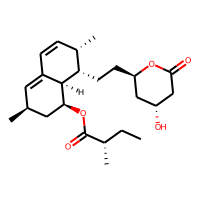
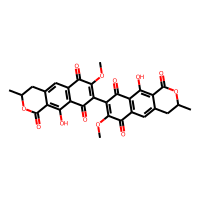

In [13]:
molset.annotate('B4.001', include_features=True, features_from_raw=False, include_sign0=True)
molset.df

[INFO    ] 3/4 molecules found in B4.001


,InChIKey,InChI,SMILES,Scaffold,Structure,A1,A2,A3,A4,A5,...,D3,D4,D5,E1,E2,E3,E4,E5,B4_features,B4_sign0
0,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,c1ccccc1,,1,1,1,1,1,...,0,0,0,1,1,1,1,1,"[Protein class, Enzyme, Oxidoreductase, Ligase]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,JYGXADMDTFJGBT-VWUMJDOOSA-N,InChI=1S/C21H30O5/c1-19-7-5-13(23)9-12(19)3-4-...,C[C@]12C[C@H](O)[C@H]3[C@@H](CCC4=CC(=O)CC[C@@...,O=C1C=C2CCC3C4CCCC4CCC3C2CC1,,1,1,1,1,1,...,0,0,0,1,1,0,0,1,"[Protein class, Nuclear receptor, Nuclear horm...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,O=C1CCCC(CCC2CC=CC3=CCCCC32)O1,,1,0,1,1,1,...,1,1,1,1,1,0,0,1,"[Protein class, Enzyme, Oxidoreductase, Transp...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,O=C1OCCc2cc3c(cc21)C(=O)C(C1=CC(=O)c2cc4c(cc2C...,,0,0,0,0,0,...,0,0,0,0,0,0,0,0,[],NaN

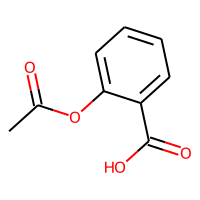
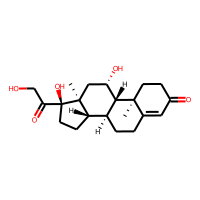
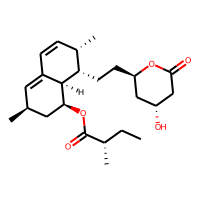
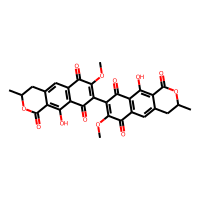

In [14]:
class_names = Molset.get_chembl_protein_classes()
molset.annotate('B4.001', include_features=True, features_from_raw=True, feature_map=class_names)
molset.df

If we want to keep both information we can apply the mapping ourself

[INFO    ] 3/4 molecules found in B4.001


,InChIKey,InChI,SMILES,Scaffold,Structure,A1,A2,A3,A4,A5,...,E1,E2,E3,E4,E5,B4_features,B4_sign0,B4_target,B4_target_classes,B4_target_classes_name
0,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,c1ccccc1,,1,1,1,1,1,...,1,1,1,1,1,"[Class:1, Class:10, Class:645, O62664, P05979,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O62664, P05979, P23219, P35354, P79208, Q6XQN6]","[Class:1, Class:10, Class:645]","[Enzyme, Oxidoreductase, Ligase]"
1,JYGXADMDTFJGBT-VWUMJDOOSA-N,InChI=1S/C21H30O5/c1-19-7-5-13(23)9-12(19)3-4-...,C[C@]12C[C@H](O)[C@H]3[C@@H](CCC4=CC(=O)CC[C@@...,O=C1C=C2CCC3C4CCCC4CCC3C2CC1,,1,1,1,1,1,...,1,1,0,0,1,"[Class:1033, Class:1043, Class:1167, Class:12,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[P04150, P04278, P06537, P08185, P08235, P10636]","[Class:1033, Class:1043, Class:1167, Class:12,...","[Nuclear receptor, Nuclear hormone receptor su..."
2,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,O=C1CCCC(CCC2CC=CC3=CCCCC32)O1,,1,0,1,1,1,...,1,1,0,0,1,"[Class:1, Class:10, Class:1006, Class:1027, Cl...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O42275, P04035, P08183, P23975, P51639, P8190...","[Class:1, Class:10, Class:1006, Class:1027, Cl...","[Enzyme, Oxidoreductase, Transporter, Primary ..."
3,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,O=C1OCCc2cc3c(cc21)C(=O)C(C1=CC(=O)c2cc4c(cc2C...,,0,0,0,0,0,...,0,0,0,0,0,[],NaN,[],[],[]

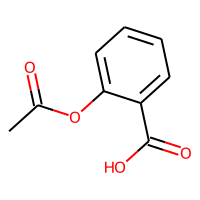
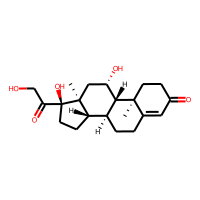
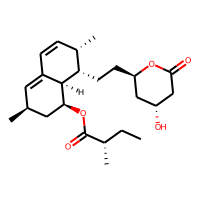
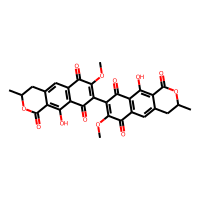

In [15]:
# separate protein from classes
class_names = Molset.get_chembl_protein_classes()
molset.annotate('B4.001', include_features=True, features_from_raw=False)
molset.df['B4_target'] = molset.df['B4_features'].apply(lambda x: [i for i in x if not i.startswith('Class:')])
molset.df['B4_target_classes'] = molset.df['B4_features'].apply(lambda x: [i for i in x if i.startswith('Class:')])
molset.df['B4_target_classes_name'] = molset.df['B4_target_classes'].apply(lambda x: [class_names[i] for i in x if i.startswith('Class:')])
molset.df

### Sign0 Values

The following are the value types that we can expect from eah space

In [8]:
for ds in cc.datasets_exemplary():
    s0 = cc.signature(ds, 'sign0')
    unique_vals = np.unique(s0[:1000])
    if len(unique_vals) == 2:
        print(ds, 'BINARY')
    elif len(unique_vals) <= 20:
        print(ds, 'DISCRETE', 'classes:', len(unique_vals))
    else:
        print(ds, 'CONTINUOUS', 'range: %.3f, %.3f' % (min(unique_vals), max(unique_vals)))

A1.001 BINARY
A2.001 BINARY
A3.001 BINARY
A4.001 BINARY
A5.001 CONTINUOUS range: -24.865, 4030.780
B1.001 BINARY
B2.001 BINARY
B3.001 BINARY
B4.001 DISCRETE classes: 3
B5.001 BINARY
C1.001 BINARY
C2.001 DISCRETE classes: 11
C3.001 DISCRETE classes: 3
C4.001 DISCRETE classes: 3
C5.001 DISCRETE classes: 16
D1.001 BINARY
D2.001 CONTINUOUS range: -4.800, 9.200
D3.001 DISCRETE classes: 3
D4.001 CONTINUOUS range: -7.384, 10.000
D5.001 BINARY
E1.001 BINARY
E2.001 BINARY
E3.001 BINARY
E4.001 BINARY
E5.001 BINARY


With Molset we can also retrieve the original value of the CC sign0.

In the case of B4 the value represents the binding affinity with 1 meaning 'low' and 2 being 'high' binding affinity

[INFO    ] 3/4 molecules found in B4.001


,InChIKey,InChI,SMILES,Scaffold,Structure,A1,A2,A3,A4,A5,...,E2,E3,E4,E5,B4_features,B4_sign0,B4_target,B4_target_classes,B4_target_classes_name,B4_values
0,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,c1ccccc1,,1,1,1,1,1,...,1,1,1,1,"[Class:1, Class:10, Class:645, O62664, P05979,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O62664, P05979, P23219, P35354, P79208, Q6XQN6]","[Class:1, Class:10, Class:645]","[Enzyme, Oxidoreductase, Ligase]","[(Class:1, 2), (Class:10, 2), (Class:645, 2), ..."
1,JYGXADMDTFJGBT-VWUMJDOOSA-N,InChI=1S/C21H30O5/c1-19-7-5-13(23)9-12(19)3-4-...,C[C@]12C[C@H](O)[C@H]3[C@@H](CCC4=CC(=O)CC[C@@...,O=C1C=C2CCC3C4CCCC4CCC3C2CC1,,1,1,1,1,1,...,1,0,0,1,"[Class:1033, Class:1043, Class:1167, Class:12,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[P04150, P04278, P06537, P08185, P08235, P10636]","[Class:1033, Class:1043, Class:1167, Class:12,...","[Nuclear receptor, Nuclear hormone receptor su...","[(Class:1033, 2), (Class:1043, 2), (Class:1167..."
2,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,O=C1CCCC(CCC2CC=CC3=CCCCC32)O1,,1,0,1,1,1,...,1,0,0,1,"[Class:1, Class:10, Class:1006, Class:1027, Cl...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O42275, P04035, P08183, P23975, P51639, P8190...","[Class:1, Class:10, Class:1006, Class:1027, Cl...","[Enzyme, Oxidoreductase, Transporter, Primary ...","[(Class:1, 2), (Class:10, 2), (Class:1006, 1),..."
3,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,O=C1OCCc2cc3c(cc21)C(=O)C(C1=CC(=O)c2cc4c(cc2C...,,0,0,0,0,0,...,0,0,0,0,[],NaN,[],[],[],[]

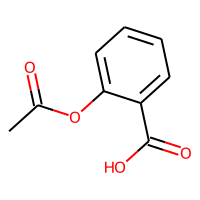
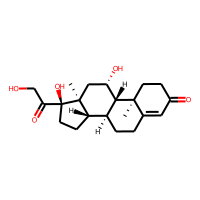
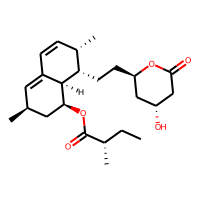
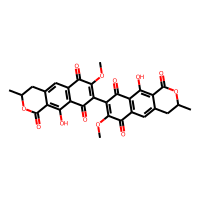

In [16]:
molset.annotate('B4.001', include_features=True, include_values=True, features_from_raw=False)
molset.df

### Uniprot annotation
In the case of B4 we can further fetch information about the targets querying Uniprot

In [17]:
apirin_targets = molset.df.iloc[0]['B4_target']

In [18]:
updf = Molset.get_uniprot_annotation(apirin_targets)
updf

100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  3.68it/s]


,Entry,Entry Name,Gene Names,Gene Names (primary),Gene Names (synonym),Gene Names (ordered locus),Gene Names (ORF),Organism,Organism (ID),Protein names,...,Glycosylation,Initiator methionine,Lipidation,Modified residue,Peptide,Post-translational modification,Propeptide,Signal peptide,Transit peptide,PDB
0,O62664,PGH1_BOVIN,PTGS1 COX-1 COX1,PTGS1,COX-1 COX1,NaN,NaN,Bos taurus (Bovine),9913,Prostaglandin G/H synthase 1 (EC 1.14.99.1) (C...,...,"CARBOHYD 68; /note=""N-linked (GlcNAc...) aspar...",NaN,NaN,NaN,NaN,NaN,NaN,"SIGNAL 1..24; /evidence=""ECO:0000255""",NaN,NaN
1,P05979,PGH1_SHEEP,PTGS1 COX1,PTGS1,COX1,NaN,NaN,Ovis aries (Sheep),9940,Prostaglandin G/H synthase 1 (EC 1.14.99.1) (C...,...,"CARBOHYD 68; /note=""N-linked (GlcNAc...) aspar...",NaN,NaN,NaN,NaN,NaN,NaN,SIGNAL 1..24,NaN,1CQE;1DIY;1EBV;1EQG;1EQH;1FE2;1HT5;1HT8;1IGX;1...
2,P23219,PGH1_HUMAN,PTGS1 COX1,PTGS1,COX1,NaN,NaN,Homo sapiens (Human),9606,Prostaglandin G/H synthase 1 (EC 1.14.99.1) (C...,...,"CARBOHYD 67; /note=""N-linked (GlcNAc...) aspar...",NaN,NaN,NaN,NaN,NaN,NaN,SIGNAL 1..23,NaN,6Y3C;
3,P35354,PGH2_HUMAN,PTGS2 COX2,PTGS2,COX2,NaN,NaN,Homo sapiens (Human),9606,Prostaglandin G/H synthase 2 (EC 1.14.99.1) (C...,...,"CARBOHYD 53; /note=""N-linked (GlcNAc...) aspar...",NaN,NaN,"MOD_RES 526; /note=""S-nitrosocysteine""; /evide...",NaN,PTM: S-nitrosylation by NOS2 (iNOS) activates ...,NaN,"SIGNAL 1..17; /evidence=""ECO:0000255""",NaN,5F19;5F1A;5IKQ;5IKR;5IKT;5IKV;5KIR;
4,P79208,PGH2_SHEEP,PTGS2 COX2,PTGS2,COX2,NaN,NaN,Ovis aries (Sheep),9940,Prostaglandin G/H synthase 2 (EC 1.14.99.1) (C...,...,"CARBOHYD 52; /note=""N-linked (GlcNAc...) aspar...",NaN,NaN,"MOD_RES 525; /note=""S-nitrosocysteine""; /evide...",NaN,PTM: S-nitrosylation by NOS2 (iNOS) activates ...,NaN,"SIGNAL 1..16; /evidence=""ECO:0000269|PubMed:75...",NaN,NaN
5,Q6XQN6,PNCB_HUMAN,NAPRT FHIP NAPRT1,NAPRT,FHIP NAPRT1,NaN,NaN,Homo sapiens (Human),9606,Nicotinate phosphoribosyltransferase (NAPRTase...,...,NaN,NaN,NaN,"MOD_RES 213; /note=""Phosphohistidine""; /eviden...",NaN,PTM: Transiently phosphorylated on a His resid...,NaN,NaN,NaN,4YUB;


### Uniprot annotation for all B1 annotated targets
Here we get the full set of proteins annotated in B1

In [19]:
s0 = cc.signature('B1.001','sign0')
all_b1_ups = sorted(list(set([x.split('(')[0] for x in s0.features if not x.startswith('Class')])))
len(all_b1_ups)

579

In [20]:
updf = Molset.get_uniprot_annotation(all_b1_ups)
updf

100%|█████████████████████████████████████████████████████████████████| 579/579 [02:51<00:00,  3.37it/s]


,Entry,Entry Name,Gene Names,Gene Names (primary),Gene Names (synonym),Gene Names (ordered locus),Gene Names (ORF),Organism,Organism (ID),Protein names,...,Glycosylation,Initiator methionine,Lipidation,Modified residue,Peptide,Post-translational modification,Propeptide,Signal peptide,Transit peptide,PDB
0,A3EZI9,A3EZI9_9HEPC,NS3,NS3,NaN,NaN,NaN,Hepacivirus C,11103,Genome polyprotein,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A5LHX3,PSB11_HUMAN,PSMB11,PSMB11,NaN,NaN,NaN,Homo sapiens (Human),9606,Proteasome subunit beta type-11 (EC 3.4.25.1) ...,...,NaN,NaN,NaN,NaN,NaN,NaN,"PROPEP 1..49; /note=""Removed in mature form""; ...",NaN,NaN,NaN
2,A5X5Y0,5HT3E_HUMAN,HTR3E,HTR3E,NaN,NaN,NaN,Homo sapiens (Human),9606,5-hydroxytryptamine receptor 3E (5-HT3-E) (5-H...,...,"CARBOHYD 175; /note=""N-linked (GlcNAc...) aspa...",NaN,NaN,NaN,NaN,NaN,NaN,"SIGNAL 1..25; /evidence=""ECO:0000255""",NaN,NaN
3,A8MPY1,GBRR3_HUMAN,GABRR3,GABRR3,NaN,NaN,NaN,Homo sapiens (Human),9606,Gamma-aminobutyric acid receptor subunit rho-3...,...,"CARBOHYD 220; /note=""N-linked (GlcNAc...) aspa...",NaN,NaN,NaN,NaN,NaN,NaN,"SIGNAL 1..23; /evidence=""ECO:0000255""",NaN,NaN
4,D2K2A8,D2K2A8_9HEPC,NS4A,NS4A,NaN,NaN,NaN,Hepacivirus C,11103,Non-structural protein 4A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,Q9Y243,AKT3_HUMAN,AKT3 PKBG,AKT3,PKBG,NaN,NaN,Homo sapiens (Human),9606,RAC-gamma serine/threonine-protein kinase (EC ...,...,"CARBOHYD 302; /note=""O-linked (GlcNAc) threoni...","INIT_MET 1; /note=""Removed""; /evidence=""ECO:00...",NaN,"MOD_RES 2; /note=""N-acetylserine""; /evidence=""...",NaN,PTM: Phosphorylation on Thr-305 and Ser-472 is...,NaN,NaN,NaN,2X18;
575,Q9Y271,CLTR1_HUMAN,CYSLTR1 CYSLT1,CYSLTR1,CYSLT1,NaN,NaN,Homo sapiens (Human),9606,Cysteinyl leukotriene receptor 1 (CysLTR1) (Cy...,...,"CARBOHYD 6; /note=""N-linked (GlcNAc...) aspara...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6RZ4;6RZ5;
576,Q9Y5N1,HRH3_HUMAN,HRH3 GPCR97,HRH3,GPCR97,NaN,NaN,Homo sapiens (Human),9606,Histamine H3 receptor (H3R) (HH3R) (G-protein ...,...,"CARBOHYD 11; /note=""N-linked (GlcNAc...) aspar...",NaN,NaN,"MOD_RES 439; /note=""Phosphoserine""; /evidence=...",NaN,NaN,NaN,NaN,NaN,7F61;
577,Q9Y5Y4,PD2R2_HUMAN,PTGDR2 CRTH2 DL1R GPR44,PTGDR2,CRTH2 DL1R GPR44,NaN,NaN,Homo sapiens (Human),9606,Prostaglandin D2 receptor 2 (Chemoattractant r...,...,"CARBOHYD 4; /note=""N-linked (GlcNAc...) aspara...",NaN,NaN,"MOD_RES 331; /note=""Phosphoserine""; /evidence=...",NaN,PTM: Phosphorylated. {ECO:0000269|PubMed:17207...,NaN,NaN,NaN,6D26;6D27;7M8W;


In [21]:
# these are the fields that Uniprot provides
list(updf.columns)

['Entry',
 'Entry Name',
 'Gene Names',
 'Gene Names (primary)',
 'Gene Names (synonym)',
 'Gene Names (ordered locus)',
 'Gene Names (ORF)',
 'Organism',
 'Organism (ID)',
 'Protein names',
 'Proteomes',
 'Taxonomic lineage',
 'Virus hosts',
 'Fragment',
 'Sequence',
 'Length',
 'Mass',
 'Gene encoded by',
 'Alternative products (isoforms)',
 'Erroneous gene model prediction',
 'Mass spectrometry',
 'Polymorphism',
 'RNA Editing',
 'Sequence caution',
 'Alternative sequence',
 'Natural variant',
 'Non-adjacent residues',
 'Non-standard residue',
 'Non-terminal residue',
 'Sequence conflict',
 'Sequence uncertainty',
 'Sequence version',
 'Coiled coil',
 'Compositional bias',
 'Domain [CC]',
 'Domain [FT]',
 'Motif',
 'Protein families',
 'Region',
 'Repeat',
 'Zinc finger',
 'Absorption',
 'Active site',
 'Activity regulation',
 'Binding site',
 'Catalytic activity',
 'Cofactor',
 'DNA binding',
 'EC number',
 'Function [CC]',
 'Kinetics',
 'Pathway',
 'pH dependence',
 'Redox potenti

## Saving

In [24]:
molset.save('./molset_test.pkl')

## Loading
We need to provide a CC instance incase we want to predict or annotate therse molecules

In [28]:
molset2 = Molset.load(cc, './molset_test.pkl')

## Combining
We can combine different Molset object as each might bring annotation for different or shared molecules

,InChIKey,InChI,SMILES,Scaffold,Structure,A1,A2,A3,A4,A5,...,E5,B4_features,B4_sign0,B4_target,B4_target_classes,B4_target_classes_name,B4_values,library,anno_A1,anno_A2
0,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,c1ccccc1,,1,1,1,1,1,...,1,"[Class:1, Class:10, Class:645, O62664, P05979,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O62664, P05979, P23219, P35354, P79208, Q6XQN6]","[Class:1, Class:10, Class:645]","[Enzyme, Oxidoreductase, Ligase]","[(Class:1, 2), (Class:10, 2), (Class:645, 2), ...",A,"[4, 2, 1]",43
1,JYGXADMDTFJGBT-VWUMJDOOSA-N,InChI=1S/C21H30O5/c1-19-7-5-13(23)9-12(19)3-4-...,C[C@]12C[C@H](O)[C@H]3[C@@H](CCC4=CC(=O)CC[C@@...,O=C1C=C2CCC3C4CCCC4CCC3C2CC1,,1,1,1,1,1,...,1,"[Class:1033, Class:1043, Class:1167, Class:12,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[P04150, P04278, P06537, P08185, P08235, P10636]","[Class:1033, Class:1043, Class:1167, Class:12,...","[Nuclear receptor, Nuclear hormone receptor su...","[(Class:1033, 2), (Class:1043, 2), (Class:1167...",A,"[4, 2, 1]",43
2,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,O=C1CCCC(CCC2CC=CC3=CCCCC32)O1,,1,0,1,1,1,...,1,"[Class:1, Class:10, Class:1006, Class:1027, Cl...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O42275, P04035, P08183, P23975, P51639, P8190...","[Class:1, Class:10, Class:1006, Class:1027, Cl...","[Enzyme, Oxidoreductase, Transporter, Primary ...","[(Class:1, 2), (Class:10, 2), (Class:1006, 1),...",A,"[4, 2, 1]",43
3,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,O=C1OCCc2cc3c(cc21)C(=O)C(C1=CC(=O)c2cc4c(cc2C...,,0,0,0,0,0,...,0,[],NaN,[],[],[],[],A,"[4, 2, 1]",43

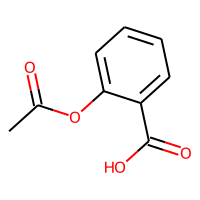
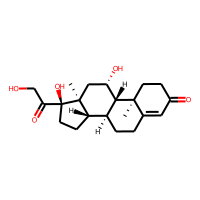
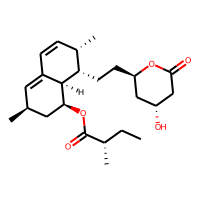
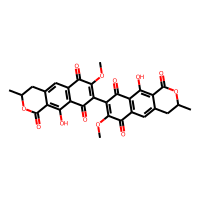

In [29]:
molset.df['library'] = 'A'
molset.df['anno_A1'] = [[4,2,1]]*4
molset.df['anno_A2'] = [43]*4
molset.df

[15:32:07] SMILES Parse Error: syntax error while parsing: Aspirin
[15:32:07] SMILES Parse Error: Failed parsing SMILES 'Aspirin' for input: 'Aspirin'
[WARNING ] Molecule 'Aspirin' not recognized as either 'inchikey', 'inchi' or 'smiles'. Considering type as 'name'.
[INFO    ] 2 unique molecules provided
getting Name-InChI map: 100%|█████████████████████████████████████████████| 2/2 [00:02<00:00,  1.25s/it]


,Name,InChIKey,InChI,SMILES,Scaffold,Structure
0,Aspirin,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,c1ccccc1,
1,Erlotinib,GTTBEUCJPZQMDZ-UHFFFAOYSA-N,InChI=1S/C22H23N3O4.ClH/c1-4-16-6-5-7-17(12-16...,C#Cc1cc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)ccc1.Cl,c1ccc(Nc2ncnc3ccccc23)cc1,

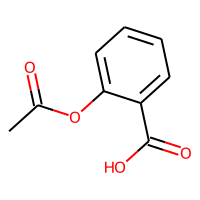
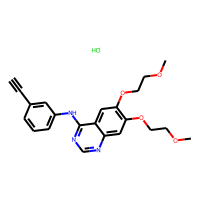

In [30]:
molecules = ['Aspirin','Erlotinib']
molset2 = Molset(cc, molecules)
molset2.df

,Name,InChIKey,InChI,SMILES,Scaffold,Structure,library,anno_B
0,Aspirin,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,c1ccccc1,,B,42
1,Erlotinib,GTTBEUCJPZQMDZ-UHFFFAOYSA-N,InChI=1S/C22H23N3O4.ClH/c1-4-16-6-5-7-17(12-16...,C#Cc1cc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)ccc1.Cl,c1ccc(Nc2ncnc3ccccc23)cc1,,B,42

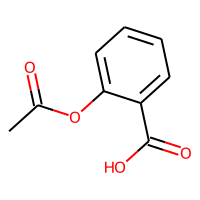
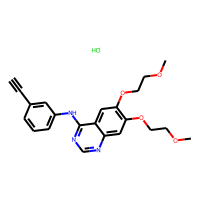

In [31]:
molset2.df['library'] = 'B'
molset2.df['anno_B'] = 42
molset2.df

In [32]:
mc = Molset.combine(cc, molset, molset2)
mc.df

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## Prediction: Unsupervised k-NN

The prediction Molset offer is based on a k-NN search.

Briefly:  
1) query molecules are signaturized (predicted in sign4 space), 
2) filtered based on applicability (argument  `applicability_thr_query`), 
3) up to 1000 neighbors are fetched for each with faiss, 
4) neighbors are then filtered by distance based on the significativity value `pvalue_thr_nn`, and by applicability `applicability_thr_nn`, 
5) finally the `limit_top_nn` top neighbors' features are aggregated.

The results are directly saved on the DataFrame, an additional Molset object with all the neighbors details is returned.

In [14]:
nn_molset = molset.predict('B4.001', applicability_thr_query=0, applicability_thr_nn=0, pvalue_thr_nn=1e-2,
                           limit_top_nn=100, return_sign0=True, return_probas=True)

  0%|                                                                             | 0/1 [00:00<?, ?it/s][WARNING ] 5 out of the last 5 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7f94640f15f0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
[WARNING ] 6 out of the last 6 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7f9464180cb0> triggered tf.function retracing. Tracing is e

by setting True the argument `return_sign0` we also get the sign0 like predictions

In [15]:
np.vstack(molset.df['B4_predicted_sign0'].values)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [16]:
np.unique( np.vstack(molset.df['B4_predicted_sign0'].values) )

array([0, 1])

by setting True the argument `return_probas` we also get the sign0 like predictions

In [17]:
np.vstack(molset.df['B4_probas_sign0'].values)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
np.unique( np.vstack(molset.df['B4_probas_sign0'].values) )

array([0.        , 0.01      , 0.01010101, 0.02      , 0.02020202,
       0.03      , 0.03030303, 0.04      , 0.04040404, 0.05      ,
       0.06      , 0.08      , 0.09      , 0.1       , 0.12      ,
       0.13      , 0.14      , 0.16      , 0.17      , 0.21      ,
       0.21212121, 0.25      , 0.26      , 0.32      , 0.33      ,
       0.38      , 0.41      , 0.42      , 0.63      , 0.66      ,
       0.68      , 0.69      , 0.74747475, 0.84      , 0.87878788,
       0.91919192, 0.99      ])

we can `blacklist` some neighbors that we do not want to use for perdiction

In [9]:
blacklist = nn_molset.df.InChIKey.tolist()[:5]
nn_molset_blacklisted = molset.predict('B4.001', applicability_thr_query=0, applicability_thr_nn=0, pvalue_thr_nn=1e-3,
                                       limit_top_nn=5, return_sign0=True, blacklist=blacklist)

  0%|                                                                             | 0/1 [00:00<?, ?it/s][WARNING ] 5 out of the last 5 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7fad68480050> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
[WARNING ] 6 out of the last 6 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7fad06f26440> triggered tf.function retracing. Tracing is e

In [10]:
set(nn_molset.df['InChIKey']) - set(nn_molset_blacklisted.df['InChIKey'])

{'ACBUMLHZTSHRKJ-LZCJYPHUSA-N',
 'ACBUMLHZTSHRKJ-YXUFBLGQSA-N',
 'ADZPEGVGCRMCJB-HFFWVFNMSA-N',
 'AHVDPZLQANCRDN-IAGOWNOFSA-N',
 'AJLFOPYRIVGYMJ-INTXDZFKSA-N'}

we can map the targets and class for the prediction to get a human readable format

,Name,InChIKey,InChI,SMILES,Structure,A1,A2,A3,A4,A5,...,B4_target,B4_target_classes,B4_target_classes_name,B4_values,B4_NN,B4_predicted,B4_predicted_sign0,B4_predicted_target,B4_predicted_target_classes,B4_predicted_target_classes_name
0,Aspirin,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,,1,1,1,1,1,...,"[O62664, P05979, P23219, P35354, P79208, Q6XQN6]","[Class:1, Class:10, Class:645]","[Enzyme, Oxidoreductase, Ligase]","[(Class:1, 2), (Class:10, 2), (Class:645, 2), ...","[FUGDCKXBUZFEON-UHFFFAOYSA-N, FYVHHXCRTMBFSG-U...","[Class:1, Class:10, Class:1031, Class:1054, Cl...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O42713, P00176, P00918, P04798, P15121]","[Class:1, Class:10, Class:1031, Class:1054, Cl...","[Enzyme, Oxidoreductase, Cytochrome P450, Cyto..."
1,Hydrocortisone,JYGXADMDTFJGBT-VWUMJDOOSA-N,InChI=1S/C21H30O5/c1-19-7-5-13(23)9-12(19)3-4-...,C[C@]12C[C@H](O)[C@H]3[C@@H](CCC4=CC(=O)CC[C@@...,,1,1,1,1,1,...,"[P04150, P04278, P06537, P08185, P08235, P10636]","[Class:1033, Class:1043, Class:1167, Class:12,...","[Nuclear receptor, Nuclear hormone receptor su...","[(Class:1033, 2), (Class:1043, 2), (Class:1167...","[ALEXXDVDDISNDU-JZYPGELDSA-N, APRTUYUNMHTWBF-R...","[Class:1, Class:10, Class:1033, Class:1043, Cl...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[P06536, P08185, P08235, P15207, P28845, P8036...","[Class:1, Class:10, Class:1033, Class:1043, Cl...","[Enzyme, Oxidoreductase, Nuclear receptor, Nuc..."
2,Lovastatin,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,,1,0,1,1,1,...,"[O42275, P04035, P08183, P23975, P51639, P8190...","[Class:1, Class:10, Class:1006, Class:1027, Cl...","[Enzyme, Oxidoreductase, Transporter, Primary ...","[(Class:1, 2), (Class:10, 2), (Class:1006, 1),...","[AHVDPZLQANCRDN-IAGOWNOFSA-N, AJLFOPYRIVGYMJ-I...","[Class:1, Class:10, P04035, P51639]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[P04035, P51639]","[Class:1, Class:10]","[Enzyme, Oxidoreductase]"
3,Xanthomegnin,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,,0,0,0,0,0,...,[],[],[],[],"[CLTKLOUSISNVNQ-PIBVTPLVSA-N, DRJFFABFDXTDCD-I...","[Class:1, Class:1006, Class:1027, Class:1030, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[P10636, P55072, Q13522, Q15257, Q9NUW8, Q9Y2R2]","[Class:1, Class:1006, Class:1027, Class:1030, ...","[Enzyme, Transporter, Primary active transport..."

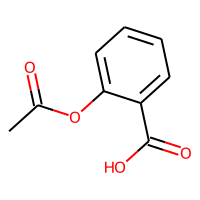
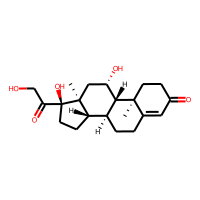
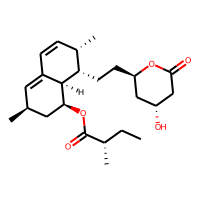
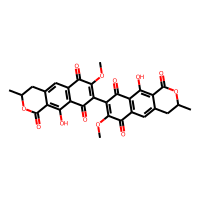

In [16]:
molset.df['B4_predicted_target'] = molset.df['B4_predicted'].apply(lambda x: [i for i in x if not i.startswith('Class:')])
molset.df['B4_predicted_target_classes'] = molset.df['B4_predicted'].apply(lambda x: [i for i in x if i.startswith('Class:')])
molset.df['B4_predicted_target_classes_name'] = molset.df['B4_predicted_target_classes'].apply(lambda x: [class_names[i] for i in x if i.startswith('Class:')])
molset.df

,InChIKey,InChI,SMILES,Structure,B4,B4_features
0,ACBUMLHZTSHRKJ-LZCJYPHUSA-N,InChI=1S/C24H36O5/c1-14(2)9-22(26)29-21-11-15(...,CC(C)CC(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)[C@...,,1,"[Class:1, Class:10, P51639]"
1,ACBUMLHZTSHRKJ-YXUFBLGQSA-N,InChI=1S/C24H36O5/c1-14(2)9-22(26)29-21-11-15(...,CC(C)CC(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)[C@...,,1,"[Class:1, Class:10, P51639]"
2,ADZPEGVGCRMCJB-HFFWVFNMSA-N,InChI=1S/C26H33ClO4/c1-16-11-19-6-3-17(2)23(10...,C[C@H]1C=C2C=C[C@H](C)[C@H](CCC3C[C@@H](O)CC(=...,,1,"[Class:1, Class:10, P51639]"
3,AHVDPZLQANCRDN-IAGOWNOFSA-N,InChI=1S/C20H24FNO3/c1-13(2)18-6-7-19(14-4-3-5...,CC(C)c1ccc(-c2cc(F)ccc2)n1CC[C@@H]1C[C@@H](O)C...,,1,"[Class:1, Class:10, P51639]"
4,AJLFOPYRIVGYMJ-INTXDZFKSA-N,InChI=1S/C23H34O5/c1-4-14(2)23(26)28-20-7-5-6-...,CC[C@H](C)C(=O)O[C@H]1CCC=C2C=C[C@H](C)[C@H](C...,,1,"[Class:1, Class:10, P04035, P51639]"
5,ALEXXDVDDISNDU-JZYPGELDSA-N,InChI=1S/C23H32O6/c1-13(24)29-12-19(27)23(28)9...,CC(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=...,,1,"[Class:3, P08185]"
6,APRTUYUNMHTWBF-REEZCCHISA-N,"InChI=1S/C27H44O2/c1-18(7-6-14-25(2,3)29)22-10...",C[C@H](CCCC(C)(C)O)[C@H]1CC[C@H]2[C@@H]3CCC4=C...,,1,"[Class:7, Q9UHC9]"
7,ATRIUXCDTABZSH-GJIXVOHXSA-N,InChI=1S/C30H40ClFO7/c1-17-13-21-20-8-7-18-14-...,C[C@H]1CC2C3CCC4=CC(=O)C=CC4(C)[C@@]3(F)[C@@H]...,,1,"[Class:1033, Class:1043, Class:1167, Class:12,..."
8,BFZHCUBIASXHPK-ATWVFEABSA-N,InChI=1S/C21H30O3/c1-12(22)16-6-7-17-15-5-4-13...,CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...,,1,"[Class:1, Class:10, Class:1033, Class:1043, Cl..."
9,BFZHCUBIASXHPK-DIIDONFZSA-N,InChI=1S/C21H30O3/c1-12(22)16-6-7-17-15-5-4-13...,CC(=O)C1CCC2C3CCC4=CC(=O)CCC4(C)C3[C@H](O)CC12C,,1,"[Class:1033, Class:1043, Class:1167, Class:12,..."

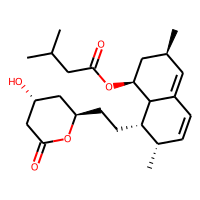
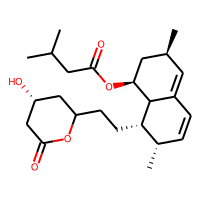
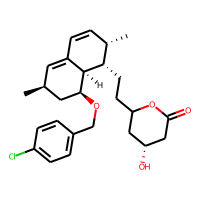
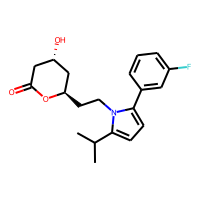
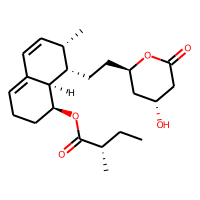
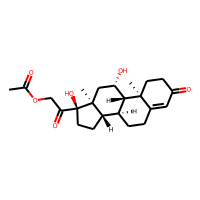
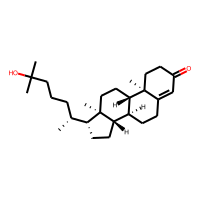
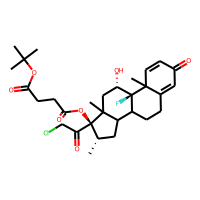
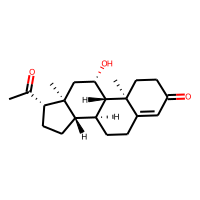
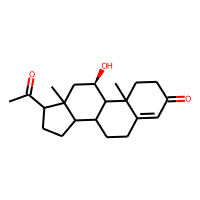
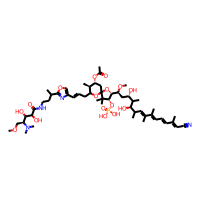
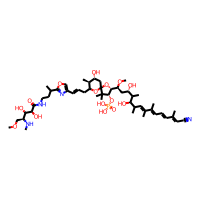
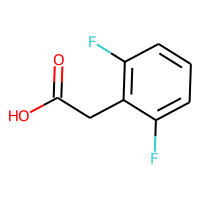
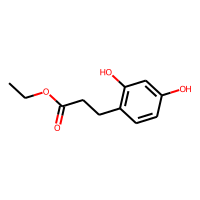
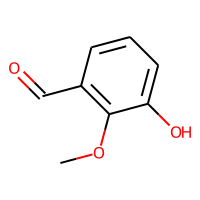
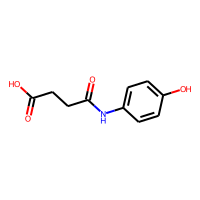
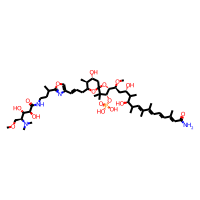
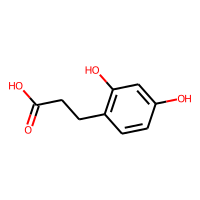
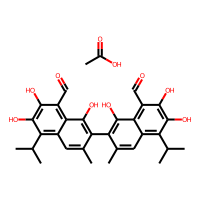
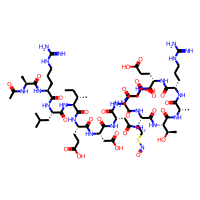

In [17]:
nn_molset.df

## Signaturize and project

In [4]:
molset.signaturize()

[INFO    ] Loading faiss with AVX2 support.
[INFO    ] Successfully loaded faiss with AVX2 support.
2023-02-09 17:36:11.091605: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
  0%|                                                                            | 0/1 [00:00<?, ?it/s]2023-02-09 17:36:12.776074: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /.singularity.d/libs
2023-02-09 17:36:12.776097: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-09 17:36:12.776115: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (goethe): /proc/driver/nvidia/version does not exist
2023-02-09 17:36:12.776277: I tensorflow/core/platform/cpu_feature_gua

,InChIKey,InChI,SMILES,Scaffold,Structure,A1,A2,A3,A4,A5,...,E5,B4_features,B4_sign0,B4_target,B4_target_classes,B4_target_classes_name,B4_values,library,anno_A1,anno_A2
0,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,c1ccccc1,,1,1,1,1,1,...,1,"[Class:1, Class:10, Class:645, O62664, P05979,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O62664, P05979, P23219, P35354, P79208, Q6XQN6]","[Class:1, Class:10, Class:645]","[Enzyme, Oxidoreductase, Ligase]","[(Class:1, 2), (Class:10, 2), (Class:645, 2), ...",A,"[4, 2, 1]",43
1,JYGXADMDTFJGBT-VWUMJDOOSA-N,InChI=1S/C21H30O5/c1-19-7-5-13(23)9-12(19)3-4-...,C[C@]12C[C@H](O)[C@H]3[C@@H](CCC4=CC(=O)CC[C@@...,O=C1C=C2CCC3C4CCCC4CCC3C2CC1,,1,1,1,1,1,...,1,"[Class:1033, Class:1043, Class:1167, Class:12,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[P04150, P04278, P06537, P08185, P08235, P10636]","[Class:1033, Class:1043, Class:1167, Class:12,...","[Nuclear receptor, Nuclear hormone receptor su...","[(Class:1033, 2), (Class:1043, 2), (Class:1167...",A,"[4, 2, 1]",43
2,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,O=C1CCCC(CCC2CC=CC3=CCCCC32)O1,,1,0,1,1,1,...,1,"[Class:1, Class:10, Class:1006, Class:1027, Cl...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[O42275, P04035, P08183, P23975, P51639, P8190...","[Class:1, Class:10, Class:1006, Class:1027, Cl...","[Enzyme, Oxidoreductase, Transporter, Primary ...","[(Class:1, 2), (Class:10, 2), (Class:1006, 1),...",A,"[4, 2, 1]",43
3,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,O=C1OCCc2cc3c(cc21)C(=O)C(C1=CC(=O)c2cc4c(cc2C...,,0,0,0,0,0,...,0,[],NaN,[],[],[],[],A,"[4, 2, 1]",43

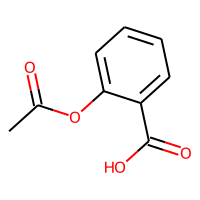
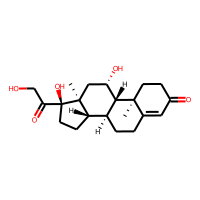
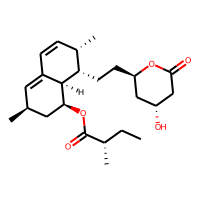
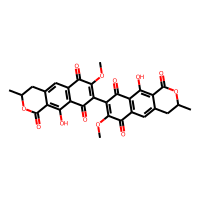

In [33]:
molset.df

In [34]:
from sklearn.manifold import TSNE

In [7]:
molset.project(TSNE(),'TSNE')

/aloy/home/mbertoni/code/chemical_checker/package/chemicalchecker/core/molkit.py:513: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.df['%s_%s1' % (ds, projector_name)] = proj[:, 0]
/aloy/home/mbertoni/code/chemical_checker/package/chemicalchecker/core/molkit.py:514: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.df['%s_%s2' % (ds, projector_name)] = proj[:, 1]
/aloy/home/mbertoni/code/chemical_checker/package/chemicalchecker/core/molkit.py:513: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

,Name,InChIKey,InChI,SMILES,Scaffold,Structure,A1.001_sign,A1.001_appl,A2.001_sign,A2.001_appl,...,E1.001_TSNE1,E1.001_TSNE2,E2.001_TSNE1,E2.001_TSNE2,E3.001_TSNE1,E3.001_TSNE2,E4.001_TSNE1,E4.001_TSNE2,E5.001_TSNE1,E5.001_TSNE2
0,Aspirin,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,c1ccccc1,,"[-0.09854843, -0.09858992, -0.08122011, 0.0852...",0.636510,"[0.0954787, 0.062150583, 0.09963023, -0.094807...",0.609424,...,-21.035366,49.040840,-186.405533,157.499252,-611.168762,-8.801235,166.594971,335.715149,-146.007996,-537.468018
1,Hydrocortisone,JYGXADMDTFJGBT-VWUMJDOOSA-N,InChI=1S/C21H30O5/c1-19-7-5-13(23)9-12(19)3-4-...,C[C@]12C[C@H](O)[C@H]3[C@@H](CCC4=CC(=O)CC[C@@...,O=C1C=C2CCC3C4CCCC4CCC3C2CC1,,"[0.09190383, -0.09133407, -0.09192844, 0.09192...",0.615053,"[0.09478691, 0.09478396, -0.08074406, -0.09465...",0.681470,...,-140.678833,-74.629822,2.754475,271.838898,-238.680298,109.604820,260.529053,141.606506,11.987394,-285.992310
2,Lovastatin,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,O=C1CCCC(CCC2CC=CC3=CCCCC32)O1,,"[0.09171718, -0.09178025, -0.09192447, 0.09191...",0.652509,"[0.09801023, 0.053251926, 0.09645821, -0.09479...",0.593321,...,-19.019806,-72.618156,117.090622,82.676781,-492.752594,-381.286438,360.702332,429.651978,58.731102,-490.730133
3,Xanthomegnin,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,O=C1OCCc2cc3c(cc21)C(=O)C(C1=CC(=O)c2cc4c(cc2C...,,"[0.06657691, 0.09419611, 0.09720854, 0.0972118...",0.587838,"[-0.10190322, 0.10201151, -0.10195675, 0.10154...",0.618490,...,-142.694412,47.029152,-72.069366,-31.662884,-120.264198,-262.880432,454.636353,235.543335,-192.751602,-332.730164

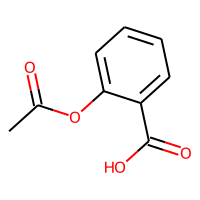
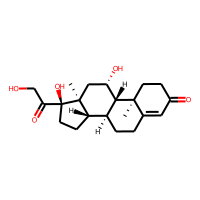
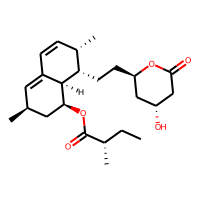
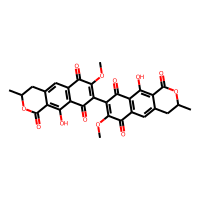

In [8]:
molset.df

In [7]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib_venn import venn3
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from chemicalchecker.util.plot import canvas, cc_grid, make_cbar_ax, cc_colors, homogenous_ticks, cc_coords, set_style, projection, coord_color
set_style()
%matplotlib inline

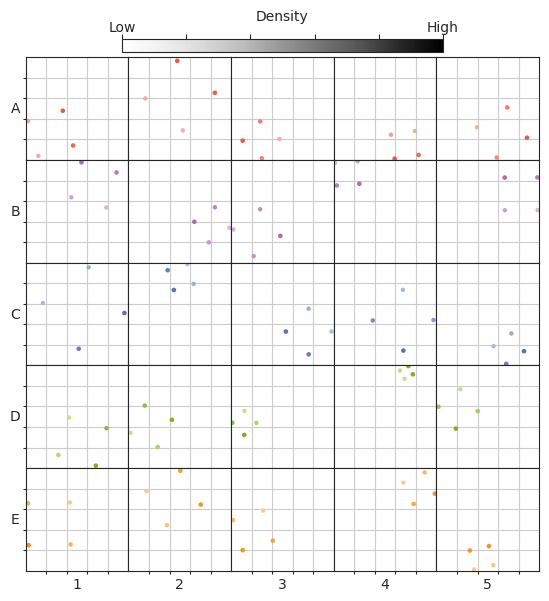

In [18]:
fig, grid = canvas(width=15,height=15, dpi=100)
axl, *axes = cc_grid(fig, grid, legend_out=True)
make_cbar_ax(axl, title='Density', cmap=cm.Greys)
for ax, ds in zip(axes, cc.datasets_exemplary()):
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [cc_colors(ds,0.5), cc_colors(ds)])
    projection([molset.df[['%s_TSNE1'%ds,'%s_TSNE2'%ds]].values], front_kwargs=[{'density':True,'density_kwargs':{'s_max':11,'s_min':10,'cmap':cmap}}], ax=ax)
    homogenous_ticks(ax,4)

### Mark a selection

In [21]:
mark = molset.df[molset.df['Name']=='Aspirin']

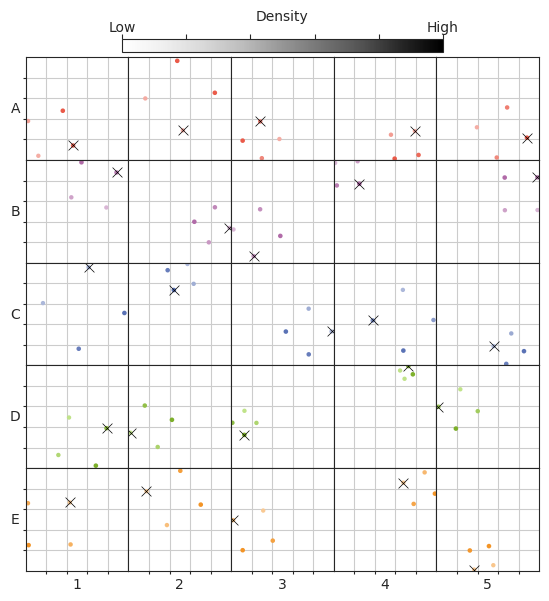

In [28]:
fig, grid = canvas(width=15,height=15, dpi=100)
axl, *axes = cc_grid(fig, grid, legend_out=True)
make_cbar_ax(axl, title='Density', cmap=cm.Greys)
for ax, ds in zip(axes, cc.datasets_exemplary()):
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [cc_colors(ds,0.5), cc_colors(ds)])
    projection([molset.df[['%s_TSNE1'%ds,'%s_TSNE2'%ds]].values], front_kwargs=[{'density':True,'density_kwargs':{'s_max':11,'s_min':10,'cmap':cmap}}], ax=ax)
    projection([mark[['%s_TSNE1'%ds,'%s_TSNE2'%ds]].values], front_kwargs=[{'density':False,'scatter_kwargs':{'s':50,'c':'k','marker':"x",'lw':0.5}}], ax=ax,update_proj_limits=False)
    homogenous_ticks(ax,4)

## Using HPC cluster
Any function of the Molset object can be easily forwarded to the cluster to access more resources if need the case

Especially the *predict*, *signaturize*, and *project* function would benefit more computational resources being available

Here's an example with some molecules from GDSC1000.

[INFO    ] 130 unique molecules provided


,InChIKey,InChI,SMILES,Scaffold,Structure
0,AHJRHEGDXFFMBM-UHFFFAOYSA-N,InChI=1S/C24H29N7O2/c1-15-19-14-27-24(28-20-8-...,CC(=O)c1c(C)c2cnc(Nc3ncc(N4CCNCC4)cc3)nc2n(C2C...,O=c1ccc2cnc(Nc3ccc(N4CCNCC4)cn3)nc2n1C1CCCC1,
1,AQGNHMOJWBZFQQ-UHFFFAOYSA-N,InChI=1S/C22H18Cl2N8/c1-13-10-29-21(31-13)17-1...,Cc1cnc(-c2c[nH]c(=NCCN=c3ccc(C#N)c[nH]3)nc2-c2...,c1ccc(-c2nc(=NCCN=c3cccc[nH]3)[nH]cc2-c2ncc[nH...,
2,AVLYNJZZQYEFEA-XDJHFCHBSA-N,InChI=1S/C20H16N6S/c21-12-15(19-25-17-5-1-2-6-...,N#C/C(=C1/Nc2ccccc2S1)c1nc(=NCCc2cnccc2)[nH]cc1,C(=C1Nc2ccccc2S1)c1cc[nH]c(=NCCc2cccnc2)n1,
3,AXNUEXXEQGQWPA-UHFFFAOYSA-N,InChI=1S/C13H10Cl2N2O4S/c1-8-6-10(17(18)19)3-5...,Cc1c(NS(=O)(=O)c2c(Cl)ccc(Cl)c2)ccc([N+](=O)[O...,O=S(=O)(Nc1ccccc1)c1ccccc1,
4,AYUNIORJHRXIBJ-TXHRRWQRSA-N,InChI=1S/C31H43N3O8/c1-8-12-33-26-21-13-17(2)1...,C=CCNC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@H](C...,O=C1C=C2CCCCCCC=CCCC=CC=CC=NC(=C1)C2=O,
...,...,...,...,...,...
125,ZDZOTLJHXYCWBA-VCVYQWHSSA-N,InChI=1S/C43H53NO14/c1-22-26(55-37(51)32(48)30...,CC(=O)O[C@@]12CO[C@@H]1C[C@H](O)[C@@]1(C)C(=O)...,O=C(CCc1ccccc1)OC1C=C2CC(=O)C3CCC4OCC4C3C(OC(=...,
126,ZFVRYNYOPQZKDG-UHFFFAOYSA-N,InChI=1S/C23H27F3N4O3/c1-22(2)10-17-19(18(32)1...,CC1(C)CC(=O)c2c(C(F)(F)F)nn(-c3ccc(C(N)=O)c(NC...,O=C1CCCc2c1cnn2-c1cccc(NC2CCCCC2)c1,
127,ZGBGPEDJXCYQPH-UHFFFAOYSA-N,InChI=1S/C27H25N5O2/c1-17-8-9-21(31-25(33)18-6...,Cc1ccc(NC(=O)c2cccc(C(C)(C)C#N)c2)cc1Nc1ccc2nc...,O=C(Nc1cccc(Nc2ccc3nc[nH]c(=O)c3c2)c1)c1ccccc1,
128,ZHXNIYGJAOPMSO-UHFFFAOYSA-N,InChI=1S/C32H41N5O4S2/c1-20-16-26(41-7)25(30(4...,COc1c(C(=O)N2CCN(C(C)=O)CC2)cc(Sc2cnc(NC(=O)c3...,O=C(Nc1ncc(Sc2cccc(C(=O)N3CCNCC3)c2)s1)c1ccccc1,

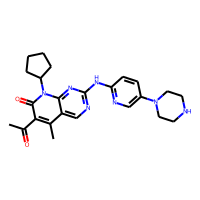
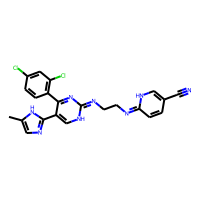
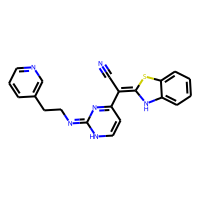
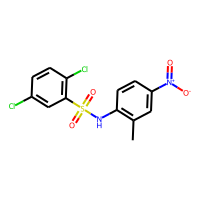
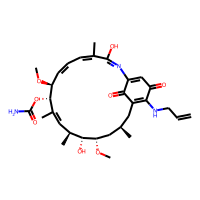
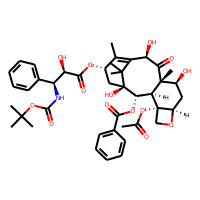
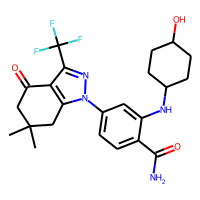
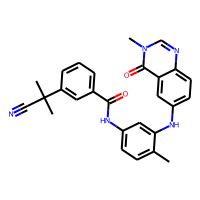
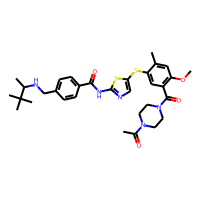
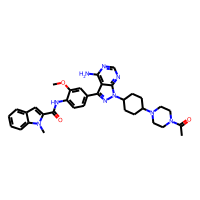

In [7]:
molecules = ['CC(=O)c1c(C)c2cnc(Nc3ncc(N4CCNCC4)cc3)nc2n(C2CCCC2)c1=O',
 'Cc1cnc(-c2c[nH]c(=NCCN=c3ccc(C#N)c[nH]3)nc2-c2c(Cl)cc(Cl)cc2)[nH]1',
 'N#C/C(=C1/Nc2ccccc2S1)c1nc(=NCCc2cnccc2)[nH]cc1',
 'Cc1c(NS(=O)(=O)c2c(Cl)ccc(Cl)c2)ccc([N+](=O)[O-])c1',
 'C=CCNC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@H](C)/C=C(\\C)[C@H](OC(N)=O)[C@@H](OC)/C=C\\C=C(/C)C(O)=NC(=CC1=O)C2=O',
 'CCC1=C/C(=C2/NNC(C)=C2c2cc3c(cc2)OCCO3)C(=O)C=C1O',
 'CS(=O)(=O)CCNCc1ccc(-c2cc3c(cc2)ncnc3Nc2cc(Cl)c(OCc3cc(F)ccc3)cc2)o1',
 'O=C1/C(=N/Nc2cc3ccc(S(=O)(=O)O)cc3cc2)C=C(S(=O)(=O)O)c2c1nccc2',
 'CN(NC(=O)CC(=O)NN(C)C(=S)c1ccccc1)C(=S)c1ccccc1',
 'CO[C@H]1[C@@H](N(C)C(=O)c2ccccc2)C[C@@H]2O[C@@]1(C)n1c3ccccc3c3c4CN=C(O)c4c4c5ccccc5n2c4c31',
 'COC(=O)CNC(=O)C(=O)OC',
 'Cn1nnc2c(C(N)=O)ncn2c1=O',
 'CS(=O)(=O)c1ccc(C(=O)Nc2ccc(Cl)c(-c3ccccn3)c2)c(Cl)c1',
 'CC[C@H](CO)N=c1nc2c(c(NCc3ccccc3)[nH]1)ncn2C(C)C',
 'O=C(/C=C/c1ccc(CN(CCO)CCc2c[nH]c3ccccc23)cc1)NO',
 'CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(=O)N2CCCC[C@H]2C(=O)O[C@H]([C@H](C)C[C@@H]2CC[C@@H](OC(=O)C(C)(CO)CO)[C@H](OC)C2)CC(=O)[C@H](C)/C=C(\\C)[C@@H](O)[C@@H](OC)C(=O)[C@H](C)C[C@H](C)/C=C/C=C/C=C/1C',
 'c1ccc2c(CCNc3ccc(N=c4cc[nH]cc4)cc3)c[nH]c2c1',
 'Cc1c(Cl)ccc(O)c1',
 'COc1c(NS(=O)(=O)c2c(F)cc(F)cc2)cc(-c2cc3c(cc2)nccc3-c2cnncc2)cn1',
 'Cc1cn2c(=O)cc(N3CCOCC3)nc2c(C(C)Nc2ccccc2)c1',
 'COc1cc2c(Oc3ccc(NC(=O)C4(C(=O)Nc5ccc(F)cc5)CC4)cc3F)ccnc2cc1OCCCN1CCOCC1',
 'Cn1cnc2c(F)c(Nc3ccc(Br)cc3Cl)c(C(=O)NOCCO)cc21',
 'N[C@@H](CSC(c1ccccc1)(c1ccccc1)c1ccccc1)C(=O)O',
 'OC[C@H](Cc1ccccc1)Nc1c2ncn(Cc3ccc(-c4ccccc4)cc3)c2nc(Oc2ccc3CCCc3c2)n1',
 'Cc1c(C)c2c(s1)-n1c(C)nnc1[C@H](C(=O)OC(C)(C)C)N=C2c1ccc(Cl)cc1',
 'CN(C)CCOc1ccc(-c2n/c(=c3/ccc4=C(N=O)CCc4c3)c(=C3C=CNC=C3)[nH]2)cc1',
 'CCN(CC)CCCCN=c1ncc2cc(-c3cc(OC)cc(OC)c3)c(NC(=O)NC(C)(C)C)nc2[nH]1',
 'CCc1cncnc1N1CCN(Cc2nc3c(cc(C(F)(F)F)cc3)[nH]2)CC1',
 'CN(Cc1nc2c(N)[nH]c(=N)nc2nc1)c1ccc(C(=O)N[C@@H](CCC(=O)O)C(=O)O)cc1',
 'O=C(c1c(F)ccc(Cc2nnc(O)c3ccccc23)c1)N1CCN(C(=O)C2CC2)CC1',
 'CCc1c2Cn3c(cc4c(COC(=O)[C@]4(O)CC)c3=O)-c2nc2c1cc(O)cc2',
 'NC(=O)C1CCCc2c1[nH]c1ccc(Cl)cc21',
 'NC(=O)c1ccc(N(C(N)=O)c2c(F)cccc2F)nc1-c1ccc(F)cc1F',
 'Cc1cc(=Nc2cc(N3CCN(C)CC3)nc(Sc3ccc(NC(=O)C4CC4)cc3)n2)[nH][nH]1',
 'O=C(NOCC1CC1)c1ccc(F)c(F)c1Nc1ccc(I)cc1Cl',
 'Oc1ncc(F)c(O)n1',
 'COC(=O)[C@H](CCSC)NC(=O)c1ccc(NC[C@@H](N)CS)cc1-c1ccccc1',
 'Nc1cccc2c1CN(C1CCC(O)=NC1=O)C2=O',
 'CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)c1cnccn1)B(O)O',
 'Cc1cn(-c2cc(NC(=O)c3ccc(C)c(Nc4nccc(-c5cccnc5)n4)c3)cc(C(F)(F)F)c2)cn1',
 'NC(=O)Nc1cc(-c2cccc(F)c2)sc1C(=O)N[C@H]1CCCNC1',
 'N=C(N)NC(=N)NCCc1ccccc1',
 'Nc1ccccc1NC(=O)c1ccc(CNC(=O)OCc2cccnc2)cc1',
 'Cc1cn2c(=O)cc(N3CCOCC3)nc2c([C@@H](C)Nc2ccccc2C(=O)O)c1',
 'C/C=C(/C)C(=O)O[C@H]1C(C)=C2[C@@H]3OC(=O)[C@@](C)(O)[C@@]3(O)[C@@H](OC(=O)CCC)C[C@](C)(OC(C)=O)[C@H]2[C@@H]1OC(=O)CCCCCCC',
 'OCCCN=c1cc(-c2nc(Nc3cccc(Cl)c3)ncc2)cc[nH]1',
 'O=c1cc(N2CCOCC2)oc2c(-c3c4sc5ccccc5c4ccc3)cccc12',
 'CC1(C)CCC(c2ccc(Cl)cc2)=C(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4cc(S(=O)(=O)C(F)(F)F)c(N[C@H](CCN5CCOCC5)CSc5ccccc5)cc4)cc3)CC2)C1',
 'C[C@]1(c2nc3cccc(C(N)=O)c3[nH]2)CCCN1',
 'Cn1c(=O)n(-c2ccc(C(C)(C)C#N)cc2)c2c1cnc1c2cc(-c2cc3ccccc3nc2)cc1',
 'Cc1cnc(Nc2ccc(OCCN3CCCC3)cc2)[nH]c1=Nc1cc(S(=O)(=O)NC(C)(C)C)ccc1',
 'COc1c(OC)cc2c(c1)ncn2-c1cc(OCc2ccccc2C(F)(F)F)c(C(N)=O)s1',
 'CC[C@]1(O)C[C@H]2CN(CCc3c([nH]c4ccccc34)[C@@](C(=O)OC)(c3c(OC)cc4c(c3)[C@@]35CCN6CC=C[C@@](CC)([C@@H](OC(C)=O)[C@](O)(C(=O)OC)[C@@H]3N4C)[C@H]65)C2)C1.O=S(=O)(O)O',
 'CCn1c(-c2nonc2N)nc2c1c(OC[C@H]1CCCNC1)cnc2C#CC(C)(C)O',
 'O=c1nc(-c2ccc(C(F)(F)F)cc2)[nH]c2c1CSCC2',
 'O=C(/C=C/c1cccnc1)NCCCCC1CCN(C(=O)c2ccccc2)CC1',
 'O=C1/C(=C/c2cccs2)CC/C1=C\\c1cccs1',
 'C=C1C(=O)O[C@H]2[C@H]1CC/C(C)=C\\CC[C@@]1(C)O[C@H]21',
 'Cc1c(Nc2nccc(-c3cnccc3)n2)cc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1',
 'COc1c(CO)cc(-c2nc3c(cc2)c(N2CCOC[C@@H]2C)nc(N2CCOC[C@@H]2C)n3)cc1',
 'O=C(/C=C/c1ccccc1)NC(NC(S)=Nc1cccc2cccnc12)C(Cl)(Cl)Cl',
 'CS(=O)(=O)N1CCN(Cc2cc3c(s2)c(N2CCOCC2)nc(-c2c4cn[nH]c4ccc2)n3)CC1',
 'CC(=O)Nc1cccc(-n2c(=O)n(C3CC3)c(=O)c3c(Nc4ccc(I)cc4F)n(C)c(=O)c(C)c32)c1',
 'CC(O)(CS(=O)(=O)c1ccc(F)cc1)C(=O)Nc1ccc(C#N)c(C(F)(F)F)c1',
 'C[C@@]1(C(=O)Nc2ccc(F)nc2)CCCN1c1nc(=Nc2cc(C3CC3)[nH]n2)c2cccn2[nH]1',
 'CCC/C=C/C=C/C(=O)OC1/C(=C/C(=O)OC)CC2CC(C(C)O)OC(=O)CC(O)CC3CC(OC(C)=O)C(C)(C)C(O)(CC4C/C(=C/C(=O)OC)CC(/C=C/C(C)(C)C1(O)O2)O4)O3',
 'CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1',
 'CCc1cc(Nc2nccc(-c3c(-c4ccc(OC)c(C(=O)Nc5c(F)cccc5F)c4)nc4ccccn34)n2)c(OC)cc1N1CCC(N2CCN(S(C)(=O)=O)CC2)CC1',
 'NS(=O)(=O)OC[C@@H]1CC(n2ccc3c(N[C@H]4CCc5ccccc54)ncnc32)C[C@@H]1O',
 'CN(c1c(CN=c2[nH]c(Nc3cc4c(cc3)NC(=O)C4)ncc2C(F)(F)F)cccn1)S(C)(=O)=O',
 'C=C(c1ccc(C(=O)O)cc1)c1c(C)cc2c(c1)C(C)(C)CCC2(C)C',
 'COc1cc(OC)c(N(C(=O)Oc2c(C)cccc2C)c2nc(Nc3ccc(N4CCN(C)CC4)cc3)ncc2)cc1',
 'O=C(/C=C/c1cccc(S(=O)(=O)Nc2ccccc2)c1)NO',
 'CO[C@@]12[C@H](COC(N)=O)C3=C(C(=O)C(C)=C(N)C3=O)N1C[C@@H]1N[C@@H]12',
 'COc1c(OCCCN2CCOCC2)cc2ncnc(Nc3ccc(NC(=O)c4ccccc4)cc3)c2c1',
 'CN1CCN(CCOc2cc3c(c(OC4CCOCC4)c2)c(Nc2c(Cl)ccc4c2OCO4)ncn3)CC1',
 'Cc1c(C(=O)N2CCC[C@@H]2CN2CCCC2)c(C)c(/C=C2\\C(O)=Nc3c2cc(S(=O)(=O)Cc2c(Cl)cccc2Cl)cc3)[nH]1',
 'Cc1c(C#Cc2cnc3cccnn23)cc(C(=O)Nc2cc(C(F)(F)F)c(CN3CCN(C)CC3)cc2)cc1',
 'Cn1cncc1[C@@](N)(c1ccc(Cl)cc1)c1cc2c(cc1)n(C)c(=O)cc2-c1cc(Cl)ccc1',
 'CC(C)c1ccccc1Cc1cc(C(=O)Nc2ccc(S(=O)(=O)c3ccccc3C(C)(C)C)cc2)c(O)c(O)c1O',
 'CC1=C2C[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43C)[C@@H]2CC[C@]12O[C@@H]1C[C@H](C)CN[C@H]1[C@H]2C',
 'CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(=O)N2CCCC[C@H]2C(=O)O[C@H]([C@H](C)C[C@@H]2CC[C@@H](O)[C@H](OC)C2)CC(=O)[C@H](C)/C=C(\\C)[C@@H](O)[C@@H](OC)C(=O)[C@H](C)C[C@H](C)/C=C/C=C/C=C/1C',
 'COc1c(OCCCN2CCCC2)cc2nc(C3CCCCC3)[nH]c(=NC3CCN(C(C)C)CC3)c2c1',
 'COc1c(Nc2ncc(Cl)c(=Nc3ccccc3S(=O)(=O)C(C)C)[nH]2)ccc(N2CCC(N3CCN(C)CC3)CC2)c1',
 'CCn1cc(-c2c3cc(-c4cccc(CN(C)C)c4)[nH]c3ncc2)c(-c2ccc(NC(=O)N(C)C)cc2)n1',
 'CC1(C)CNc2cc(NC(=O)c3cccnc3NCc3ccncc3)ccc21',
 'CC(=O)O[C@H]1C(=O)[C@]2(C)[C@@H](O)C[C@H]3OC[C@@]3(OC(C)=O)[C@H]2[C@H](OC(=O)c2ccccc2)[C@]2(O)C[C@H](OC(=O)[C@H](O)[C@@H](NC(=O)c3ccccc3)c3ccccc3)C(C)=C1C2(C)C',
 'COc1c(NS(=O)(=O)C2(C[C@H](O)CO)CC2)c(Nc2c(F)cc(I)cc2)c(F)c(F)c1',
 'Oc1c(SSc2c(O)ccc3ccccc23)c2ccccc2cc1',
 'CNC(=O)c1ccccc1Sc1ccc2c(/C=C/c3ccccn3)[nH]nc2c1',
 'CCCCC(C=O)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](CC(C)C)NC(=O)OCc1ccccc1',
 'NC(=O)c1ncn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c1N',
 'C[C@@H](Oc1c(N)ncc(-c2cn(C3CCNCC3)nc2)c1)c1c(Cl)cc(F)cc1Cl',
 'CC1=C(/C=C/C(C)=C/C=C/C(C)=C/C(=O)O)C(C)(C)CCC1',
 'COc1cc2nccc(Oc3ccc(NC(=O)N=c4cc(C)o[nH]4)c(Cl)c3)c2cc1OC',
 'O=C(NOC[C@H](O)CO)c1ccc(F)c(F)c1Nc1ccc(I)cc1F',
 'CCNC(=O)C1=C(c2ccc(CN3CCOCC3)cc2)/C(=C2\\C=C(C(C)C)C(O)=CC2=O)ON1',
 'Oc1cccc(-c2nc3c(oc4c3cccn4)c(N3CCOCC3)n2)c1',
 'CC(C)C[C@@H](C=O)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(C)C)NC(=O)OCc1ccccc1',
 'COc1c(Cl)cc(Cl)c(N=c2c(C#N)c[nH]c3cc(OCCCN4CCN(C)CC4)c(OC)cc23)c1',
 'Cc1cc(N2CCOCC2)cc2c1N/C(=C1/C(=O)N=CC=C1NC[C@@H](O)c1cc(Cl)ccc1)N2',
 'CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1O[C@H]1CCOC1',
 'CCC1=C[C@@H]2CN(C1)Cc1c([nH]c3ccccc13)[C@@](C(=O)OC)(c1c(OC)cc3c(c1)[C@@]14CCN5CC=C[C@@](CC)([C@@H](OC(C)=O)[C@](O)(C(=O)OC)[C@@H]1N3C)[C@H]54)C2.O=C(O)[C@H](O)[C@@H](O)C(=O)O',
 'C/C(O)=C(\\C#N)C(=O)Nc1cc(Br)ccc1Br',
 'COc1c(OC)c(OC)cc(/C=C/C(=O)N2CCC=CC2=O)c1',
 'O=C(NCCCN=c1[nH]c(Nc2cccc(NC(=O)N3CCCC3)c2)ncc1I)c1cccs1',
 'COc1c(O)c(OC)cc([C@@H]2c3cc4c(cc3[C@@H](O[C@@H]3O[C@@H]5CO[C@@H](C)O[C@H]5[C@H](O)[C@H]3O)[C@H]3COC(=O)[C@H]23)OCO4)c1',
 'CC[C@@]1(O)C(=O)OCc2c1cc1-c3nc4ccccc4cc3Cn1c2=O',
 'O=C(CCCCCCC(=O)Nc1ccccc1)NO',
 'NC(=O)c1cccc(-c2cc(Nc3ccc(OC(F)(F)F)cc3)ncn2)c1',
 'CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\\C(O)=Nc3ccc(F)cc32)c1C',
 'CCc1nc(=N)[nH]c(N)c1-c1ccc(Cl)cc1',
 'Cc1c(C(=O)N[C@H](C(=O)N[C@H](C)[C@@H](O)[C@H](C)C(=O)N[C@H](C(=O)NCCc2nc(-c3nc(C(=O)NCCC[S+](C)C)cs3)cs2)[C@@H](C)O)C(OC2OC(CO)C(O)C(O)C2OC2OC(CO)C(O)C(OC(=N)[O-])C2O)c2cnc[nH]2)nc([C@H](CC(N)=O)NC[C@H](N)C(N)=O)[nH]c1=N.O=S(=O)(O)O',
 'O=C(O)c1c(C2CCCC2)cc(-c2c[nH]c3c2cc(-c2ccccc2)cn3)cc1',
 'NC(=O)[C@@H](CCC(F)(F)F)N(Cc1ccc(-c2ncon2)cc1F)S(=O)(=O)c1ccc(Cl)cc1',
 'COc1c(OCCCN2CCOCC2)cc2c(Nc3cc(Cl)c(F)cc3)ncnc2c1',
 'OC1=NC(=NCc2cccs2)SC1=Cc1ccc2ncccc2c1',
 'CC[C@@H]1C(=O)N(C)c2cnc(Nc3ccc(C(=O)NC4CCN(C)CC4)cc3OC)nc2N1C1CCCC1',
 'O=c1cc(-c2c3Sc4ccccc4Sc3ccc2)oc(N2CCOCC2)c1',
 'CCn1c(-c2nonc2N)nc2cnc(Oc3cccc(NC(=O)c4ccc(OCCN5CCOCC5)cc4)c3)cc21',
 'NCC(=O)Nc1ccc(-n2nc(C(F)(F)F)cc2-c2ccc3c(c2)ccc2ccccc23)cc1',
 'CCNc1cc(=NC2CCC(O)CC2)[nH]c(Nc2cc3c(cc2)n(Cc2ccccc2)cc3)n1',
 'Cc1c2cc(-c3cc(OC[C@@H](N)Cc4c[nH]c5ccccc45)cnc3)ccc2n[nH]1',
 'CCCS(=O)(=O)Nc1c(F)c(C(=O)c2c[nH]c3c2cc(Cl)cn3)c(F)cc1',
 'Cc1nc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)cc(N2CCN(CCO)CC2)n1',
 'CC(=O)O[C@@]12CO[C@@H]1C[C@H](O)[C@@]1(C)C(=O)[C@H](O)C3=C(C)[C@@H](OC(=O)[C@H](O)[C@@H](NC(=O)OC(C)(C)C)c4ccccc4)C[C@@](O)([C@@H](OC(=O)c4ccccc4)[C@@H]12)C3(C)C',
 'CC1(C)CC(=O)c2c(C(F)(F)F)nn(-c3ccc(C(N)=O)c(NC4CCC(O)CC4)c3)c2C1',
 'Cc1ccc(NC(=O)c2cccc(C(C)(C)C#N)c2)cc1Nc1ccc2ncn(C)c(=O)c2c1',
 'COc1c(C(=O)N2CCN(C(C)=O)CC2)cc(Sc2cnc(NC(=O)c3ccc(CNC(C)C(C)(C)C)cc3)s2)c(C)c1',
 'COc1cc(-c2nn(C3CCC(N4CCN(C(C)=O)CC4)CC3)c3ncnc(N)c23)ccc1NC(=O)c1cc2ccccc2n1C']
molset = Molset(cc, molecules)
molset.df

In [4]:
# we define the molset file name
molset_fn = os.getcwd()+'/GDSC.molset'

In [ ]:
# and save it's initial status
molset.save(molset_fn)

In [12]:
# we signaturize on all CC spaces
molset.func_hpc('signaturize',
                func_args=[], 
                func_kwargs=dict(datasets='exemplary'),
                hpc_kwargs=dict(cpu=8, wait=True),
                data_path=molset_fn)

[INFO    ] data will be saved to: /aloy/home/mbertoni/projects/cc_molset/GDSC.molset
[INFO    ] Writing file /aloy/scratch/mbertoni/tmp_jobs/CC_Molset_signaturize7ne94yi_/job-CC_Molset_signaturize.sh...


In [13]:
# if we now reload the dataset it contains the result of the signaturization
molset = Molset.load(cc, molset_fn)
molset.df.columns

Index(['InChIKey', 'InChI', 'SMILES', 'Scaffold', 'Structure', 'A1.001_sign',
       'A1.001_appl', 'A2.001_sign', 'A2.001_appl', 'A3.001_sign',
       'A3.001_appl', 'A4.001_sign', 'A4.001_appl', 'A5.001_sign',
       'A5.001_appl', 'B1.001_sign', 'B1.001_appl', 'B2.001_sign',
       'B2.001_appl', 'B3.001_sign', 'B3.001_appl', 'B4.001_sign',
       'B4.001_appl', 'B5.001_sign', 'B5.001_appl', 'C1.001_sign',
       'C1.001_appl', 'C2.001_sign', 'C2.001_appl', 'C3.001_sign',
       'C3.001_appl', 'C4.001_sign', 'C4.001_appl', 'C5.001_sign',
       'C5.001_appl', 'D1.001_sign', 'D1.001_appl', 'D2.001_sign',
       'D2.001_appl', 'D3.001_sign', 'D3.001_appl', 'D4.001_sign',
       'D4.001_appl', 'D5.001_sign', 'D5.001_appl', 'E1.001_sign',
       'E1.001_appl', 'E2.001_sign', 'E2.001_appl', 'E3.001_sign',
       'E3.001_appl', 'E4.001_sign', 'E4.001_appl', 'E5.001_sign',
       'E5.001_appl'],
      dtype='object')

In [30]:
# then we project using UMAP
from umap import UMAP
molset.func_hpc('project',
                func_args=[UMAP()], 
                func_kwargs=dict(datasets='exemplary'),
                hpc_kwargs=dict(cpu=8, wait=True),
                data_path=molset_fn)

[INFO    ] data will be saved to: /aloy/home/mbertoni/projects/cc_molset/GDSC.molset
[INFO    ] Writing file /aloy/scratch/mbertoni/tmp_jobs/CC_Molset_projectita08bd1/job-CC_Molset_project.sh...


In [5]:
# if we now reload the dataset it contains the result of the projection
molset = Molset.load(cc, molset_fn)
molset.df.columns

Index(['InChIKey', 'InChI', 'SMILES', 'Scaffold', 'Structure', 'A1.001_sign',
       'A1.001_appl', 'A2.001_sign', 'A2.001_appl', 'A3.001_sign',
       ...
       'E1.001_UMAP1', 'E1.001_UMAP2', 'E2.001_UMAP1', 'E2.001_UMAP2',
       'E3.001_UMAP1', 'E3.001_UMAP2', 'E4.001_UMAP1', 'E4.001_UMAP2',
       'E5.001_UMAP1', 'E5.001_UMAP2'],
      dtype='object', length=105)

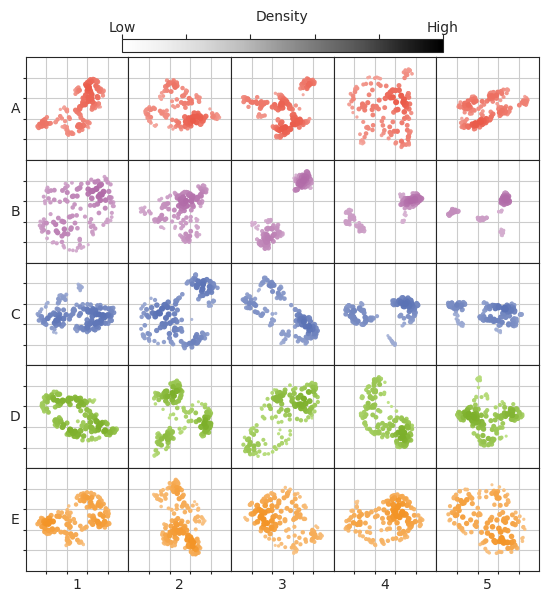

In [11]:
# we can visualize all spaces projected
fig, grid = canvas(width=15,height=15, dpi=100)
axl, *axes = cc_grid(fig, grid, legend_out=True)
make_cbar_ax(axl, title='Density', cmap=cm.Greys)
for ax, ds in zip(axes, cc.datasets_exemplary()):
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [cc_colors(ds,0.5), cc_colors(ds)])
    # UMAP results need to be centered
    P = molset.df[['%s_UMAP1'%ds,'%s_UMAP2'%ds]].values
    P_centered = P-np.mean(P, axis=0)
    projection([P_centered], 
               front_kwargs=[{'density':True,'density_kwargs':{'s_max':20,'s_min':5,'cmap':cmap}}], ax=ax, proj_margin_perc=0.15)
    homogenous_ticks(ax,4)

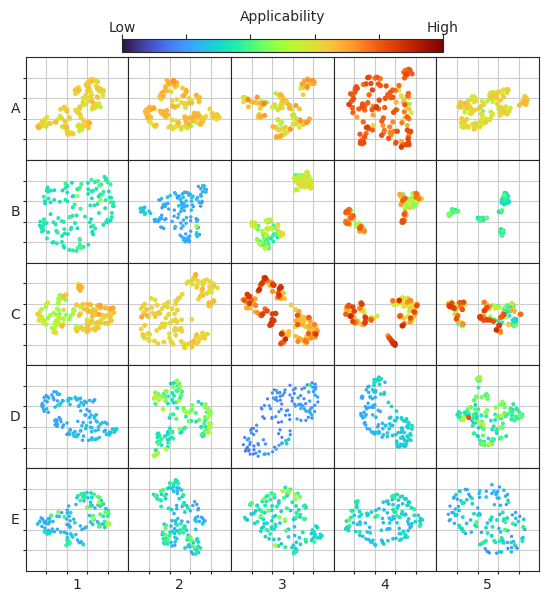

In [12]:
# we can visualize all spaces projected coloring by applicability
fig, grid = canvas(width=15,height=15, dpi=100)
axl, *axes = cc_grid(fig, grid, legend_out=True)
make_cbar_ax(axl, title='Applicability', cmap=cm.turbo)
for ax, ds in zip(axes, cc.datasets_exemplary()):
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [cc_colors(ds,0.5), cc_colors(ds)])
    # UMAP results need to be centered
    P = molset.df[['%s_UMAP1'%ds,'%s_UMAP2'%ds]].values
    P_centered = P-np.mean(P, axis=0)
    # color and size by applicability
    S = molset.df['%s_appl'%ds]
    # print high applivability mols on top
    order = np.argsort(S)
    projection([P_centered[order]], 
               front_kwargs=[{'scatter':True,'scatter_kwargs':{'s':S[order]*10,'c':S[order],'cmap':'turbo', 'vmin':0,'vmax':1}}], ax=ax,
               proj_margin_perc=0.15)
    homogenous_ticks(ax,4)

In [ ]:
# we can predict via kNN
molset.func_hpc('predict',
                func_args=['B4.001'], 
                func_kwargs=dict(shorten_dscode=False, max_nr_nn=50),
                hpc_kwargs=dict(cpu=16, wait=True),
                data_path=molset_fn)

[INFO    ] data will be saved to: /aloy/home/mbertoni/projects/cc_molset/GDSC.molset
[INFO    ] Writing file /aloy/scratch/mbertoni/tmp_jobs/CC_Molset_predictxijt6jum/job-CC_Molset_predict.sh...


In [15]:
# if we now reload the dataset it contains the result of the kNN prediction
molset = Molset.load(cc, molset_fn)
molset.df.columns.tolist()

['InChIKey',
 'InChI',
 'SMILES',
 'Scaffold',
 'Structure',
 'A1.001_sign',
 'A1.001_appl',
 'A2.001_sign',
 'A2.001_appl',
 'A3.001_sign',
 'A3.001_appl',
 'A4.001_sign',
 'A4.001_appl',
 'A5.001_sign',
 'A5.001_appl',
 'B1.001_sign',
 'B1.001_appl',
 'B2.001_sign',
 'B2.001_appl',
 'B3.001_sign',
 'B3.001_appl',
 'B4.001_sign',
 'B4.001_appl',
 'B5.001_sign',
 'B5.001_appl',
 'C1.001_sign',
 'C1.001_appl',
 'C2.001_sign',
 'C2.001_appl',
 'C3.001_sign',
 'C3.001_appl',
 'C4.001_sign',
 'C4.001_appl',
 'C5.001_sign',
 'C5.001_appl',
 'D1.001_sign',
 'D1.001_appl',
 'D2.001_sign',
 'D2.001_appl',
 'D3.001_sign',
 'D3.001_appl',
 'D4.001_sign',
 'D4.001_appl',
 'D5.001_sign',
 'D5.001_appl',
 'E1.001_sign',
 'E1.001_appl',
 'E2.001_sign',
 'E2.001_appl',
 'E3.001_sign',
 'E3.001_appl',
 'E4.001_sign',
 'E4.001_appl',
 'E5.001_sign',
 'E5.001_appl',
 'A1.001_UMAP1',
 'A1.001_UMAP2',
 'A2.001_UMAP1',
 'A2.001_UMAP2',
 'A3.001_UMAP1',
 'A3.001_UMAP2',
 'A4.001_UMAP1',
 'A4.001_UMAP2',
 'A

Text(0.5, 1.0, 'B4.001')

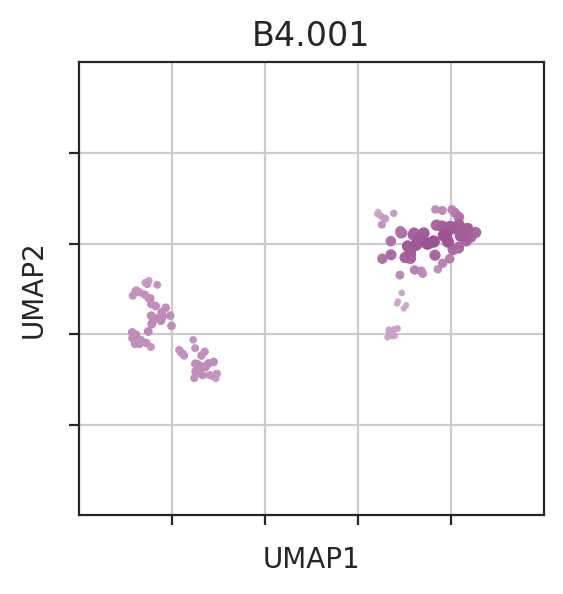

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3), dpi=200)
ds = 'B4.001'
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [cc_colors(ds,0.4), cc_colors(ds,-0.2)])
P = molset.df[['%s_UMAP1'%ds,'%s_UMAP2'%ds]].values
P_centered = P-np.mean(P, axis=0)
projection([P_centered[order]], 
           front_kwargs=[{'density':True,'density_kwargs':{'s_max':20,'s_min':5,'cmap':cmap}}], ax=ax,
           proj_margin_perc=0.15)
homogenous_ticks(ax,4)
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.set_title('B4.001')

<AxesSubplot:xlabel='B4.001_UMAP1', ylabel='Count'>

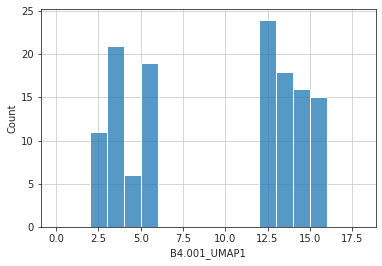

In [60]:
# we notice the 2  clusters in B4
ds = 'B4.001'
sns.histplot(molset.df['%s_UMAP1'%ds], binwidth=1, binrange=(0,18))

In [42]:
# we map class codes to names
class_names = Molset.get_chembl_protein_classes(prefix_level=True)
molset.df['B4_predicted_target'] = molset.df['B4.001_predicted_features'].apply(lambda x: [i for i in x if not i.startswith('Class:')])
molset.df['B4_predicted_target_classes'] = molset.df['B4.001_predicted_features'].apply(lambda x: [i for i in x if i.startswith('Class:')])
molset.df['B4_predicted_target_classes_name'] = molset.df['B4_predicted_target_classes'].apply(lambda x: [class_names[i] for i in x if i.startswith('Class:')])
molset.df[['InChIKey', 'B4_predicted_target', 'B4_predicted_target_classes_name']]

,InChIKey,B4_predicted_target,B4_predicted_target_classes_name
0,AHJRHEGDXFFMBM-UHFFFAOYSA-N,"[P11802, Q00534]","[L1:Enzyme, L3:Protein Kinase, L4:CMGC protein..."
1,AQGNHMOJWBZFQQ-UHFFFAOYSA-N,"[O00311, P11309, P24941, P49841, Q00535, Q0GMK...","[L1:Enzyme, L3:Protein Kinase, L3:Protein kina..."
2,AVLYNJZZQYEFEA-XDJHFCHBSA-N,"[A0A059UE90, P06493, P45983, P45984, P48729, P...","[L1:Enzyme, L3:Protein Kinase, L4:CK1 protein ..."
3,AXNUEXXEQGQWPA-UHFFFAOYSA-N,[],[]
4,AYUNIORJHRXIBJ-TXHRRWQRSA-N,"[P04626, P07900]","[L1:Enzyme, L3:Protein Kinase, L4:TK protein k..."
...,...,...,...
125,ZDZOTLJHXYCWBA-VCVYQWHSSA-N,"[P00533, P08684, P21452]","[L1:Enzyme, L2:Family A G protein-coupled rece..."
126,ZFVRYNYOPQZKDG-UHFFFAOYSA-N,"[P02829, P07900, P08238, P14625, P15108, P4114...","[L1:Enzyme, L2:Phosphodiesterase, L1:Other mem..."
127,ZGBGPEDJXCYQPH-UHFFFAOYSA-N,[P15056],"[L1:Enzyme, L3:Protein Kinase, L4:TKL protein ..."
128,ZHXNIYGJAOPMSO-UHFFFAOYSA-N,"[O54967, P06213, P19174, P43403, P43405, P5233...","[L1:Enzyme, L3:Protein Kinase, L4:TK protein k..."


In [44]:
molset.save(molset_fn, overwrite=True)

In [61]:
# we fetch all uniprot annotation
all_targets = molset.df['B4_predicted_target'].explode().unique()
len(all_targets)
updf = Molset.get_uniprot_annotation(all_targets)
updf

512

In [65]:
# so that we can also get protein target names
up_gene_map  = dict(zip(updf['Entry'],updf['Gene Names (primary)']))
molset.df['B4_predicted_target_names'] = molset.df['B4_predicted_target'].apply(lambda x: [up_gene_map[i] for i in x if i])

In [66]:
# we separate the clusters and inspect them
clst1 = molset.df[molset.df['%s_UMAP1'%ds] < 9][['InChIKey', 'B4_predicted_target_classes_name', 'B4_predicted_target_names']]
clst2 = molset.df[molset.df['%s_UMAP1'%ds] > 9][['InChIKey', 'B4_predicted_target_classes_name', 'B4_predicted_target_names']]

In [67]:
# this cluster has a pretty strong tyrosine kinase specificity
clst1['B4_predicted_target_classes_name'].explode().value_counts().head(10)

L1:Enzyme                                  49
L3:Protein Kinase                          49
L2:Kinase                                  49
L4:TK protein kinase group                 28
L4:Other protein kinase group              20
L4:CMGC protein kinase group               18
L4:TKL protein kinase group                17
L5:Tyrosine protein kinase Src family      14
L5:Tyrosine protein kinase VEGFR family    14
L5:Tyrosine protein kinase PDGFR family    14
Name: B4_predicted_target_classes_name, dtype: int64

In [68]:
# this cluster has a less specific nature
clst2['B4_predicted_target_classes_name'].explode().value_counts().head(10)

L1:Enzyme                                    42
L2:Transferase                               17
L2:Kinase                                    14
L3:Protein Kinase                            14
L1:Ion channel                               11
L1:Epigenetic regulator                      10
L1:Other cytosolic protein                   10
L5:Atypical protein kinase PIKK family       10
L4:Atypical protein kinase group             10
L6:Atypical protein kinase FRAP subfamily     9
Name: B4_predicted_target_classes_name, dtype: int64

In [69]:
clst1['B4_predicted_target_names'].explode().value_counts().head(10)

KDR       14
ABL1      11
EGFR      10
SRC       10
KIT       10
LCK        9
AURKA      9
PDGFRA     8
KCNH2      8
PDGFRB     8
Name: B4_predicted_target_names, dtype: int64

In [70]:
clst2['B4_predicted_target_names'].explode().value_counts().head(10)

PIK3CA     13
PIK3CD     10
PIK3CB      9
MTOR        9
PIK3CG      9
KCNH2       8
PRKDC       6
PIK3C2B     6
DHFR        6
PIK3R1      6
Name: B4_predicted_target_names, dtype: int64

In [45]:
# we can also compare with available annotation (they look pretty similar)
molset.func_hpc('annotate',
                func_args=['B4.001'], 
                func_kwargs=dict(include_features=True),
                hpc_kwargs=dict(cpu=4, wait=True),
                data_path=molset_fn)

[INFO    ] data will be saved to: /aloy/home/mbertoni/projects/cc_molset/GDSC.molset
[INFO    ] Writing file /aloy/scratch/mbertoni/tmp_jobs/CC_Molset_annotate8w4f2adr/job-CC_Molset_annotate.sh...


In [46]:
# if we now reload the dataset it contains the result of the annotation
molset = Molset.load(cc, molset_fn)
molset.df.columns.tolist()

['InChIKey',
 'InChI',
 'SMILES',
 'Scaffold',
 'Structure',
 'A1.001_sign',
 'A1.001_appl',
 'A2.001_sign',
 'A2.001_appl',
 'A3.001_sign',
 'A3.001_appl',
 'A4.001_sign',
 'A4.001_appl',
 'A5.001_sign',
 'A5.001_appl',
 'B1.001_sign',
 'B1.001_appl',
 'B2.001_sign',
 'B2.001_appl',
 'B3.001_sign',
 'B3.001_appl',
 'B4.001_sign',
 'B4.001_appl',
 'B5.001_sign',
 'B5.001_appl',
 'C1.001_sign',
 'C1.001_appl',
 'C2.001_sign',
 'C2.001_appl',
 'C3.001_sign',
 'C3.001_appl',
 'C4.001_sign',
 'C4.001_appl',
 'C5.001_sign',
 'C5.001_appl',
 'D1.001_sign',
 'D1.001_appl',
 'D2.001_sign',
 'D2.001_appl',
 'D3.001_sign',
 'D3.001_appl',
 'D4.001_sign',
 'D4.001_appl',
 'D5.001_sign',
 'D5.001_appl',
 'E1.001_sign',
 'E1.001_appl',
 'E2.001_sign',
 'E2.001_appl',
 'E3.001_sign',
 'E3.001_appl',
 'E4.001_sign',
 'E4.001_appl',
 'E5.001_sign',
 'E5.001_appl',
 'A1.001_UMAP1',
 'A1.001_UMAP2',
 'A2.001_UMAP1',
 'A2.001_UMAP2',
 'A3.001_UMAP1',
 'A3.001_UMAP2',
 'A4.001_UMAP1',
 'A4.001_UMAP2',
 'A

In [48]:
molset.df['B4_target'] = molset.df['B4_features'].apply(lambda x: [i for i in x if not i.startswith('Class:')])
molset.df['B4_target_classes'] = molset.df['B4_features'].apply(lambda x: [i for i in x if i.startswith('Class:')])
molset.df['B4_target_classes_name'] = molset.df['B4_target_classes'].apply(lambda x: [class_names[i] for i in x if i.startswith('Class:')])
molset.df[['InChIKey', 'B4_target', 'B4_target_classes_name']]

,InChIKey,B4_target,B4_target_classes_name
0,AHJRHEGDXFFMBM-UHFFFAOYSA-N,"[P11802, P24941, P48426, P49759, P52333, Q0053...","[L1:Enzyme, L3:Protein Kinase, L4:TK protein k..."
1,AQGNHMOJWBZFQQ-UHFFFAOYSA-N,"[P49840, P49841]","[L1:Enzyme, L3:Protein Kinase, L4:CMGC protein..."
2,AVLYNJZZQYEFEA-XDJHFCHBSA-N,"[P11309, P45983, P45984, P49841, P53779, Q86V86]","[L1:Enzyme, L3:Protein Kinase, L4:CAMK protein..."
3,AXNUEXXEQGQWPA-UHFFFAOYSA-N,[],[]
4,AYUNIORJHRXIBJ-TXHRRWQRSA-N,"[P04626, P07900, P08238, P41148, Q12931, Q58FG1]","[L1:Enzyme, L3:Protein Kinase, L4:TK protein k..."
...,...,...,...
125,ZDZOTLJHXYCWBA-VCVYQWHSSA-N,"[P00533, P52732, Q9HC29]","[L1:Enzyme, L2:Family B G protein-coupled rece..."
126,ZFVRYNYOPQZKDG-UHFFFAOYSA-N,"[P07900, P08238, P14625, P41148, Q12931]","[L1:Other membrane protein, L1:Other cytosolic..."
127,ZGBGPEDJXCYQPH-UHFFFAOYSA-N,"[P07947, P15056]","[L1:Enzyme, L3:Protein Kinase, L4:TK protein k..."
128,ZHXNIYGJAOPMSO-UHFFFAOYSA-N,[Q08881],"[L1:Enzyme, L3:Protein Kinase, L4:TK protein k..."


In [50]:
clst1 = molset.df[molset.df['%s_UMAP1'%ds] < 9][['InChIKey', 'B4_target_classes_name']]
clst2 = molset.df[molset.df['%s_UMAP1'%ds] > 9][['InChIKey', 'B4_target_classes_name']]

In [51]:
clst1['B4_target_classes_name'].explode().value_counts().head(10)

L1:Enzyme                                  51
L2:Kinase                                  51
L3:Protein Kinase                          51
L4:TK protein kinase group                 35
L4:Other protein kinase group              24
L4:CMGC protein kinase group               23
L4:STE protein kinase group                23
L4:TKL protein kinase group                21
L5:Tyrosine protein kinase PDGFR family    21
L5:Tyrosine protein kinase Src family      20
Name: B4_target_classes_name, dtype: int64

In [52]:
clst2['B4_target_classes_name'].explode().value_counts().head(10)

L1:Enzyme                                 32
L2:Transferase                            17
L1:Unclassified protein                   12
L2:Kinase                                 11
L3:Protein Kinase                         11
L1:Other cytosolic protein                11
L1:Epigenetic regulator                    9
L5:Atypical protein kinase PIKK family     8
L4:Atypical protein kinase group           8
L1:Membrane receptor                       8
Name: B4_target_classes_name, dtype: int64

# Annotation appendix

## A level

Most A level spaces have features that are not human interpretable we only report the readable ones (A5)

### A5, Physicochemical parameters

In [4]:
phychem_dict = {
    '1':'molecular weight',
    '2':'# heavy atoms',
    '3':'# hetero atoms',
    '4':'# rings',
    '5':'# aliphatic rings',
    '6':'# aromatic rings',
    '7':'lipophilicity (AlogP)',
    '8':'molar refractivity',
    '9':'hydrogen bond acceptor',
    '10':'hydrogen bond donor',
    '11':'polar surface area',
    '12':'# rotatable bonds',
    '13':'alerts for undesirable substructures',
    '14':'alerts from ChEMBL',
    '15':'# rule of 5 violaions',
    '16':'# rule of 3 violaions',
    '17':'quantitative estimate of druglikeness (QED)'
}

[INFO    ] 3/4 molecules found in A5.001


,Name,InChIKey,InChI,SMILES,Structure,A5,A5_values
0,Aspirin,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,,1,"[(molecular weight, 180.16), (# heavy atoms, 1..."
1,Hydrocortisone,JYGXADMDTFJGBT-VWUMJDOOSA-N,InChI=1S/C21H30O5/c1-19-7-5-13(23)9-12(19)3-4-...,C[C@]12C[C@H](O)[C@H]3[C@@H](CCC4=CC(=O)CC[C@@...,,1,"[(molecular weight, 362.47), (# heavy atoms, 2..."
2,Lovastatin,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,,1,"[(molecular weight, 404.55), (# heavy atoms, 2..."
3,Xanthomegnin,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,,0,[]

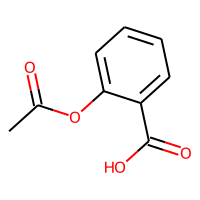
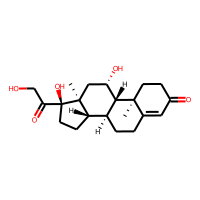
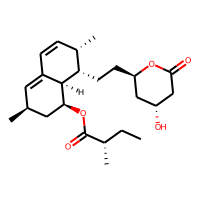
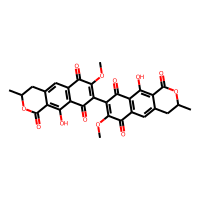

In [17]:
molset.annotate('A5.001', include_features=False, features_from_raw=True, feature_map=phychem_dict, include_values=True, filter_values=False)
molset.df

In [18]:
props_df = pd.json_normalize(molset.df['A5_values'].apply(dict))
props_df

,molecular weight,# heavy atoms,# hetero atoms,# rings,# aliphatic rings,# aromatic rings,lipophilicity (AlogP),molar refractivity,hydrogen bond acceptor,hydrogen bond donor,polar surface area,# rotatable bonds,alerts for undesirable substructures,alerts from ChEMBL,# rule of 5 violaions,# rule of 3 violaions,quantitative estimate of druglikeness (QED)
0,180.16,13.0,4.0,1.0,0.0,1.0,1.310,44.710,4.0,1.0,63.60,2.0,2.0,3.0,0.0,1.0,0.550
1,362.47,26.0,5.0,4.0,4.0,0.0,1.782,95.142,5.0,3.0,94.83,2.0,0.0,3.0,0.0,2.0,0.696
2,404.55,29.0,5.0,3.0,3.0,0.0,4.196,110.838,5.0,1.0,72.83,6.0,1.0,1.0,0.0,4.0,0.672
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Name,InChIKey,InChI,SMILES,Structure,A5,A5_values,molecular weight,# heavy atoms,# hetero atoms,...,molar refractivity,hydrogen bond acceptor,hydrogen bond donor,polar surface area,# rotatable bonds,alerts for undesirable substructures,alerts from ChEMBL,# rule of 5 violaions,# rule of 3 violaions,quantitative estimate of druglikeness (QED)
0,Aspirin,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,,1,"[(molecular weight, 180.16), (# heavy atoms, 1...",180.16,13.0,4.0,...,44.710,4.0,1.0,63.60,2.0,2.0,3.0,0.0,1.0,0.550
1,Hydrocortisone,JYGXADMDTFJGBT-VWUMJDOOSA-N,InChI=1S/C21H30O5/c1-19-7-5-13(23)9-12(19)3-4-...,C[C@]12C[C@H](O)[C@H]3[C@@H](CCC4=CC(=O)CC[C@@...,,1,"[(molecular weight, 362.47), (# heavy atoms, 2...",362.47,26.0,5.0,...,95.142,5.0,3.0,94.83,2.0,0.0,3.0,0.0,2.0,0.696
2,Lovastatin,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,,1,"[(molecular weight, 404.55), (# heavy atoms, 2...",404.55,29.0,5.0,...,110.838,5.0,1.0,72.83,6.0,1.0,1.0,0.0,4.0,0.672
3,Xanthomegnin,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,,0,[],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

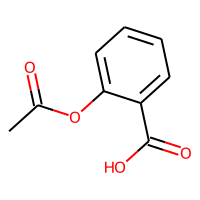
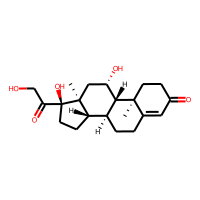
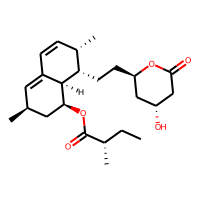
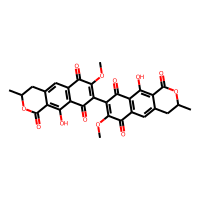

In [19]:
pd.concat([molset.df, props_df], axis=1)

## B level

### B1, Mechanism of Action

B level feature are protein (uniprot ids) and and protein classes (ChEMBL ids), in B1 we consider a activation (1) or inhibition (-1) mechanisms.

[INFO    ] 2/3 molecules found in B1.001


,Name,InChIKey,InChI,SMILES,Structure,B4,B4_features,B1,B1_features,B1_values
0,Aspirin,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,,1,"[Class:0, Class:1, Class:10, Class:645, O62664...",1,"[Class:0(-1), Class:1(1), Class:10(-1), Class:...","[(Class:0(-1), 1.0), (Class:1(1), 1.0), (Class..."
1,Lovastatin,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,,1,"[Class:0, Class:1, Class:10, Class:1006, Class...",1,"[Class:0(-1), Class:1(-1), Class:10(-1), P0403...","[(Class:0(-1), 1.0), (Class:1(-1), 1.0), (Clas..."
2,Xanthomegnin,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,,0,[],0,[],[]

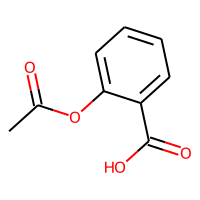
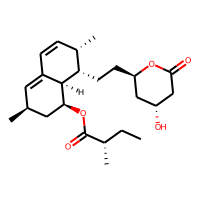
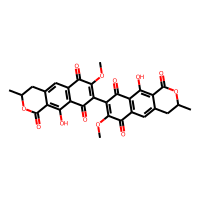

In [9]:
molset.annotate('B1.001', include_features=True, features_from_raw=True)
molset.df

In [6]:
molset.df.iloc[0]['B4_features']

['Class:0',
 'Class:1',
 'Class:10',
 'Class:645',
 'O62664',
 'P05979',
 'P23219',
 'P35354',
 'P79208',
 'Q6XQN6']

In [7]:
molset.df.iloc[0]['B1_features']

['Class:0(-1)',
 'Class:1(1)',
 'Class:10(-1)',
 'Class:1100(1)',
 'Class:12(-1)',
 'Class:1339(1)',
 'Class:1702(1)',
 'Class:409(1)',
 'Class:6(1)',
 'Class:601(-1)',
 'Class:8(-1)',
 'P04637(-1)',
 'P11021(-1)',
 'P23219(-1)',
 'P35354(-1)',
 'Q00653(-1)',
 'Q04828(-1)',
 'Q13131(1)']

### B2, Drug-metabolizing enzymes

transporters and carriers, again uniprot ids and protein classes

[INFO    ] 2/3 molecules found in B2.001


,Name,InChIKey,InChI,SMILES,Structure,B4,B4_features,B1,B1_features,B1_values,B2,B2_features
0,Aspirin,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,,1,"[Class:0, Class:1, Class:10, Class:645, O62664...",1,"[Class:0(-1), Class:1(1), Class:10(-1), Class:...","[(Class:0(-1), 1.0), (Class:1(1), 1.0), (Class...",1,"[Class:0, Class:1, Class:1006, Class:1027, Cla..."
1,Lovastatin,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,,1,"[Class:0, Class:1, Class:10, Class:1006, Class...",1,"[Class:0(-1), Class:1(-1), Class:10(-1), P0403...","[(Class:0(-1), 1.0), (Class:1(-1), 1.0), (Clas...",1,"[Class:0, Class:1, Class:10, Class:1006, Class..."
2,Xanthomegnin,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,,0,[],0,[],[],0,[]

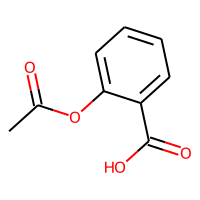
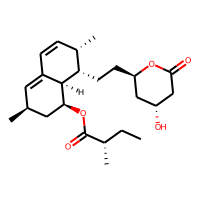
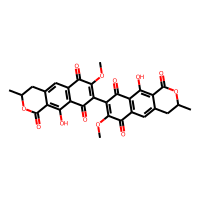

In [10]:
molset.annotate('B2.001', include_features=True, features_from_raw=True)
molset.df

### B3, Crystals

Protein structures bound to small molecules. 
Features are not protein but domains (ECOD annotation)

In [61]:
def get_ecod(ecod_domains):
    ecod_hierarchy = dict()
    f = open(ecod_domains, "r")
    for l in f:
        if l[0] == "#":
            continue
        l = l.rstrip("\n").split("\t")
        E = l[1]
        f_id = l[3]
        # [X-group].[H-group].[T-group].([F-group])
        if f_id.count('.') == 3:
            X, H, T, F = f_id.split('.')
        elif f_id.count('.') == 2:
            X, H, T = f_id.split('.')
            F = None
        else:
            print('too few: %s' %l)
        ecod_hierarchy[f'E:{E}'] = 'E:%s' % l[1].strip('"')
        ecod_hierarchy[f'X:{X}'] = 'X:%s' % l[10].strip('"')
        ecod_hierarchy[f'H:{H}'] = 'H:%s' % l[11].strip('"')
        ecod_hierarchy[f'T:{T}'] = 'T:%s' % l[12].strip('"')
        if F:
            ecod_hierarchy[f'F:{F}'] = 'F:%s' % l[13]
    f.close()
    return ecod_hierarchy

ecod_hierarchy = get_ecod('./ecod.latest.domains.txt')

[INFO    ] 2/3 molecules found in B3.001


,Name,InChIKey,InChI,SMILES,Structure,B4,B4_features,B1,B1_features,B1_values,B2,B2_features,B3,B3_features,B5,B5_features,C1,C1_features
0,Aspirin,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,,1,"[Class:0, Class:1, Class:10, Class:645, O62664...",1,"[Class:0(-1), Class:1(1), Class:10(-1), Class:...","[(Class:0(-1), 1.0), (Class:1(1), 1.0), (Class...",1,"[Class:0, Class:1, Class:1006, Class:1027, Cla...",1,"[E:e1oxrA1, E:e1tgmA1, E:e2qqtA1, E:e3gclA1, E...",1,"[Class:0, Class:1, Class:10, Class:1020, Class...",1,"[CHEBI:17891, CHEBI:22718, CHEBI:22723, CHEBI:..."
1,Lovastatin,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,,1,"[Class:0, Class:1, Class:10, Class:1006, Class...",1,"[Class:0(-1), Class:1(-1), Class:10(-1), P0403...","[(Class:0(-1), 1.0), (Class:1(-1), 1.0), (Clas...",1,"[Class:0, Class:1, Class:10, Class:1006, Class...",1,"[E:e1cqpA1, E:e1cqpB1, F:UNK_F_TYPE, H:NO_H_NA...",1,"[Class:0, Class:1, Class:10, Class:1006, Class...",1,"[CHEBI:136859, CHEBI:23888, CHEBI:23924, CHEBI..."
2,Xanthomegnin,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,,0,[],0,[],[],0,[],0,[],0,[],0,[]

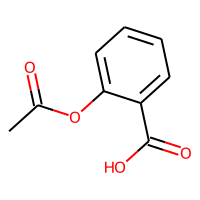
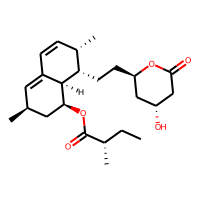
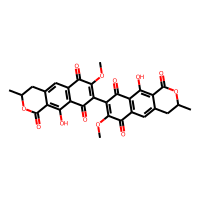

In [62]:
molset.annotate('B3.001', include_features=True, features_from_raw=True, feature_map=ecod_hierarchy)
molset.df

In [63]:
molset.df.iloc[0]['B3_features']

['E:e1oxrA1',
 'E:e1tgmA1',
 'E:e2qqtA1',
 'E:e3gclA1',
 'E:e3iazA1',
 'E:e4nsbA1',
 'E:e4nsbA2',
 'E:e6mqfA1',
 'E:e6mqfB1',
 'F:EUF07867',
 'F:UNK_F_TYPE',
 'F:Yeast_MT_like',
 'F:EUF08660',
 'F:KOG1560',
 'H:NO_H_NAME',
 'H:NO_H_NAME',
 'T:Prp8-binding region of SLU7',
 'X:NO_X_NAME',
 'X:TIM beta/alpha-barrel',
 'X:FKBP-like',
 'X:NO_X_NAME',
 'X:NO_X_NAME']

### B4, Binding

ChEMBL bioassays of 'binding' type, related to 'single proteins' with 'pChEMBL' value available, plus BindingDB. 
Affinities are discretized by protein families (Pharos), 2 correspond to high affinity and 1 to low

[INFO    ] 2/3 molecules found in B4.001


,Name,InChIKey,InChI,SMILES,Structure,B4,B4_features,B4_target,B4_target_classes,B4_target_classes_name,E1,E1_features,E2,E2_features,E3,E3_features,E4,E4_features,E5,E5_features
0,Aspirin,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,,1,"[Class:1, Class:10, Class:645, O62664, P05979,...","[O62664, P05979, P23219, P35354, P79208, Q6XQN6]","[Class:1, Class:10, Class:645]","[Enzyme, Oxidoreductase, Ligase]",1,"[ALIMENTARY TRACT AND METABOLISM, BLOOD AND BL...",1,"[Diseases (phase IV), Abortion, Spontaneous (p...",1,"[Respiratory alkalosis, Anaphylactic shock, An...",1,"[Factor 8 deficiency, acquired (marker), Prinz...",1,"[OIRCOABEOLEUMC-GEJPAHFPSA-N, NFLWUMRGJYTJIN-P..."
1,Lovastatin,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,,1,"[Class:1, Class:10, Class:1006, Class:1027, Cl...","[O42275, P04035, P08183, P23975, P51639, P8190...","[Class:1, Class:10, Class:1006, Class:1027, Cl...","[Enzyme, Oxidoreductase, Transporter, Primary ...",1,"[CARDIOVASCULAR SYSTEM, LIPID MODIFYING AGENTS...",1,"[Diseases (phase IV), Congenital Abnormalities...",0,[],0,[],1,"[OIRCOABEOLEUMC-GEJPAHFPSA-N, DOAKLVKFURWEDJ-Q..."
2,Xanthomegnin,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,,0,[],[],[],[],0,[],0,[],0,[],0,[],0,[]

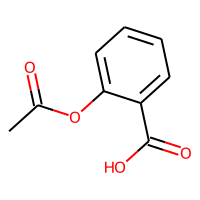
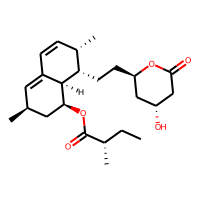
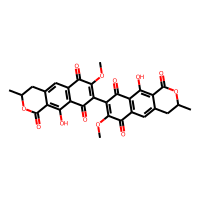

In [97]:
# separate protein from classes
class_names = Molset.get_chembl_protein_classes()
molset.annotate('B4.001', include_features=True, features_from_raw=False)
molset.df['B4_target'] = molset.df['B4_features'].apply(lambda x: [i for i in x if not i.startswith('Class:')])
molset.df['B4_target_classes'] = molset.df['B4_features'].apply(lambda x: [i for i in x if i.startswith('Class:')])
molset.df['B4_target_classes_name'] = molset.df['B4_target_classes'].apply(lambda x: [class_names[i] for i in x if i.startswith('Class:')])
molset.df

### B5, HTS bioassay

functional assays available in ChEMBL.

[INFO    ] 2/3 molecules found in B5.001


,Name,InChIKey,InChI,SMILES,Structure,B4,B4_features,B1,B1_features,B1_values,B2,B2_features,B3,B3_features,B5,B5_features
0,Aspirin,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,,1,"[Class:0, Class:1, Class:10, Class:645, O62664...",1,"[Class:0(-1), Class:1(1), Class:10(-1), Class:...","[(Class:0(-1), 1.0), (Class:1(1), 1.0), (Class...",1,"[Class:0, Class:1, Class:1006, Class:1027, Cla...",1,"[E:e1oxrA1, E:e1tgmA1, E:e2qqtA1, E:e3gclA1, E...",1,"[Class:0, Class:1, Class:10, Class:1020, Class..."
1,Lovastatin,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,,1,"[Class:0, Class:1, Class:10, Class:1006, Class...",1,"[Class:0(-1), Class:1(-1), Class:10(-1), P0403...","[(Class:0(-1), 1.0), (Class:1(-1), 1.0), (Clas...",1,"[Class:0, Class:1, Class:10, Class:1006, Class...",1,"[E:e1cqpA1, E:e1cqpB1, F:9, H:1, T:6, X:2006]",1,"[Class:0, Class:1, Class:10, Class:1006, Class..."
2,Xanthomegnin,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,,0,[],0,[],[],0,[],0,[],0,[]

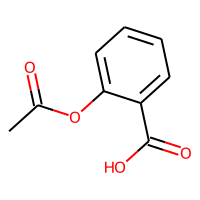
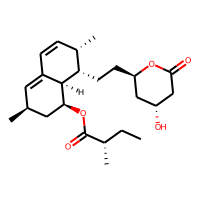
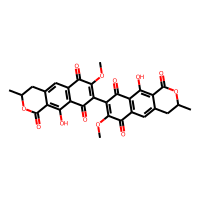

In [17]:
molset.annotate('B5.001', include_features=True, features_from_raw=True)
molset.df

## C level

### C1, Small molecules roles

CHEBI annotation

In [30]:
chebi_dict = Molset.get_chebi('./chebi.obo')

[INFO    ] 2/3 molecules found in C1.001


,Name,InChIKey,InChI,SMILES,Structure,C1,C1_features
0,Aspirin,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,,1,"[donor, benzoates, benzoic acids, drug, enzyme..."
1,Lovastatin,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,,1,"[pro-agent, drug, enzyme inhibitor, biological..."
2,Xanthomegnin,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,,0,[]

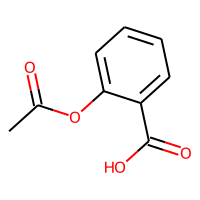
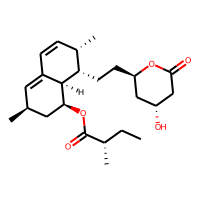
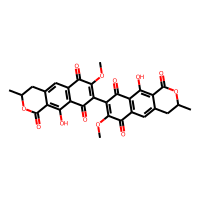

In [6]:
molset.annotate('C1.001', include_features=True, features_from_raw=False, feature_map=chebi_dict)
molset.df

### C2, Metabolic pathways

Endogenous metabolites close in metabolic pathways, features are molecules

[INFO    ] 1/3 molecules found in C2.001


,Name,InChIKey,InChI,SMILES,Structure,B4,B4_features,B1,B1_features,B1_values,...,B3,B3_features,B5,B5_features,C1,C1_features,C2,C2_features,C3,C3_features
0,Aspirin,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,,1,"[Class:0, Class:1, Class:10, Class:645, O62664...",1,"[Class:0(-1), Class:1(1), Class:10(-1), Class:...","[(Class:0(-1), 1.0), (Class:1(1), 1.0), (Class...",...,1,"[E:e1oxrA1, E:e1tgmA1, E:e2qqtA1, E:e3gclA1, E...",1,"[Class:0, Class:1, Class:10, Class:1020, Class...",1,"[CHEBI:17891, CHEBI:22718, CHEBI:22723, CHEBI:...",1,"[BSYNRYMUTXBXSQ-UHFFFAOYSA-N, OSWPMRLSEDHDFF-U...",1,"[R-HSA-1280215, R-HSA-140180, R-HSA-1430728, R..."
1,Lovastatin,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,,1,"[Class:0, Class:1, Class:10, Class:1006, Class...",1,"[Class:0(-1), Class:1(-1), Class:10(-1), P0403...","[(Class:0(-1), 1.0), (Class:1(-1), 1.0), (Clas...",...,1,"[E:e1cqpA1, E:e1cqpB1, F:UNK_F_TYPE, H:NO_H_NA...",1,"[Class:0, Class:1, Class:10, Class:1006, Class...",1,"[CHEBI:136859, CHEBI:23888, CHEBI:23924, CHEBI...",0,[],1,"[R-HSA-112311, R-HSA-112315, R-HSA-112316, R-H..."
2,Xanthomegnin,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,,0,[],0,[],[],...,0,[],0,[],0,[],0,[],0,[]

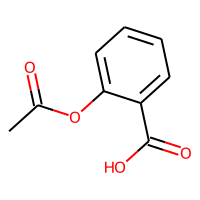
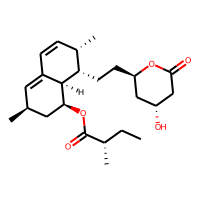
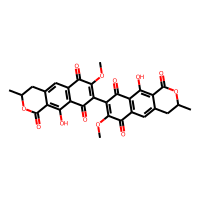

In [66]:
molset.annotate('C2.001', include_features=True, features_from_raw=True)
molset.df

### C3, Signaling pathways

Human pathways, features are Reactome ids

https://reactome.org/download/current/ReactomePathways.txt

In [68]:
def get_reactome(reactome_pathways):
    reactome = dict()
    f = open(reactome_pathways, "r")
    for l in f:
        if l[0] == "#":
            continue
        l = l.rstrip("\n").split("\t")
        reactome[l[0]] = l[1]
    f.close()
    return reactome

reactome_dict = get_reactome('./ReactomePathways.txt')

[INFO    ] 2/3 molecules found in C3.001


,Name,InChIKey,InChI,SMILES,Structure,B4,B4_features,B1,B1_features,B1_values,...,B3,B3_features,B5,B5_features,C1,C1_features,C2,C2_features,C3,C3_features
0,Aspirin,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,,1,"[Class:0, Class:1, Class:10, Class:645, O62664...",1,"[Class:0(-1), Class:1(1), Class:10(-1), Class:...","[(Class:0(-1), 1.0), (Class:1(1), 1.0), (Class...",...,1,"[E:e1oxrA1, E:e1tgmA1, E:e2qqtA1, E:e3gclA1, E...",1,"[Class:0, Class:1, Class:10, Class:1020, Class...",1,"[CHEBI:17891, CHEBI:22718, CHEBI:22723, CHEBI:...",1,"[BSYNRYMUTXBXSQ-UHFFFAOYSA-N, OSWPMRLSEDHDFF-U...",1,"[Cytokine Signaling in Immune system, COX reac..."
1,Lovastatin,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,,1,"[Class:0, Class:1, Class:10, Class:1006, Class...",1,"[Class:0(-1), Class:1(-1), Class:10(-1), P0403...","[(Class:0(-1), 1.0), (Class:1(-1), 1.0), (Clas...",...,1,"[E:e1cqpA1, E:e1cqpB1, F:UNK_F_TYPE, H:NO_H_NA...",1,"[Class:0, Class:1, Class:10, Class:1006, Class...",1,"[CHEBI:136859, CHEBI:23888, CHEBI:23924, CHEBI...",0,[],1,"[Neurotransmitter clearance, Transmission acro..."
2,Xanthomegnin,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,,0,[],0,[],[],...,0,[],0,[],0,[],0,[],0,[]

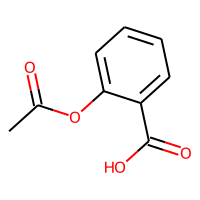
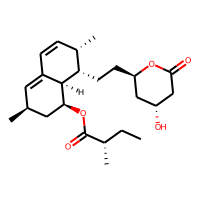
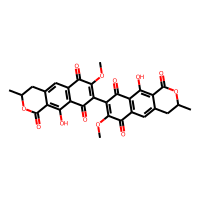

In [70]:
molset.annotate('C3.001', include_features=True, features_from_raw=True, feature_map=reactome_dict)
molset.df

### C4, Biological processes

GO BP annotation

In [73]:
def get_GO(go_obo):
    """Get GO id to name dictionary."""
    go_dict = defaultdict(str)
    f = open(go_obo, "r")
    terms = f.read().split("[Term]\n")
    for term in terms[1:]:
        term = term.split("\n")
        go_id = term[0].split("id: ")[1]
        go_name = term[1].split("name: ")[1]
        go_dict[go_id] = go_name
    f.close()
    return go_dict

go_dict = get_GO('./go.obo')

[INFO    ] 2/3 molecules found in C4.001


,Name,InChIKey,InChI,SMILES,Structure,B4,B4_features,B1,B1_features,B1_values,...,B5,B5_features,C1,C1_features,C2,C2_features,C3,C3_features,C4,C4_features
0,Aspirin,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,,1,"[Class:0, Class:1, Class:10, Class:645, O62664...",1,"[Class:0(-1), Class:1(1), Class:10(-1), Class:...","[(Class:0(-1), 1.0), (Class:1(1), 1.0), (Class...",...,1,"[Class:0, Class:1, Class:10, Class:1020, Class...",1,"[CHEBI:17891, CHEBI:22718, CHEBI:22723, CHEBI:...",1,"[BSYNRYMUTXBXSQ-UHFFFAOYSA-N, OSWPMRLSEDHDFF-U...",1,"[Cytokine Signaling in Immune system, COX reac...",1,"[prostaglandin biosynthetic process, angiogene..."
1,Lovastatin,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,,1,"[Class:0, Class:1, Class:10, Class:1006, Class...",1,"[Class:0(-1), Class:1(-1), Class:10(-1), P0403...","[(Class:0(-1), 1.0), (Class:1(-1), 1.0), (Clas...",...,1,"[Class:0, Class:1, Class:10, Class:1006, Class...",1,"[CHEBI:136859, CHEBI:23888, CHEBI:23924, CHEBI...",0,[],1,"[Neurotransmitter clearance, Transmission acro...",1,"[G2/M transition of mitotic cell cycle, neurot..."
2,Xanthomegnin,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,,0,[],0,[],[],...,0,[],0,[],0,[],0,[],0,[]

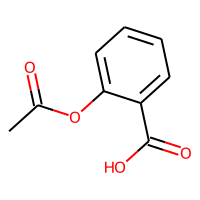
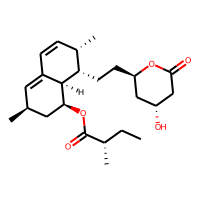
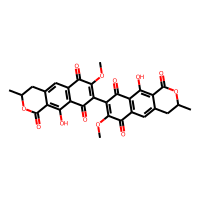

In [74]:
molset.annotate('C4.001', include_features=True, features_from_raw=True, feature_map=go_dict)
molset.df

### C5 *

Getting a complete human readable mapping from this space is tricky as the identifier are coming from multiple networks

[INFO    ] 2/3 molecules found in C5.001


,Name,InChIKey,InChI,SMILES,Structure,B4,B4_features,B1,B1_features,B1_values,...,C1,C1_features,C2,C2_features,C3,C3_features,C4,C4_features,C5,C5_features
0,Aspirin,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,,1,"[Class:0, Class:1, Class:10, Class:645, O62664...",1,"[Class:0(-1), Class:1(1), Class:10(-1), Class:...","[(Class:0(-1), 1.0), (Class:1(1), 1.0), (Class...",...,1,"[CHEBI:17891, CHEBI:22718, CHEBI:22723, CHEBI:...",1,"[BSYNRYMUTXBXSQ-UHFFFAOYSA-N, OSWPMRLSEDHDFF-U...",1,"[Cytokine Signaling in Immune system, COX reac...",1,"[prostaglandin biosynthetic process, angiogene...",1,"[inbiomap_O95319, inbiomap_P04626, inbiomap_P0..."
1,Lovastatin,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,,1,"[Class:0, Class:1, Class:10, Class:1006, Class...",1,"[Class:0(-1), Class:1(-1), Class:10(-1), P0403...","[(Class:0(-1), 1.0), (Class:1(-1), 1.0), (Clas...",...,1,"[CHEBI:136859, CHEBI:23888, CHEBI:23924, CHEBI...",0,[],1,"[Neurotransmitter clearance, Transmission acro...",1,"[G2/M transition of mitotic cell cycle, neurot...",1,"[inbiomap_O00165, inbiomap_O15354, inbiomap_O1..."
2,Xanthomegnin,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,,0,[],0,[],[],...,0,[],0,[],0,[],0,[],0,[]

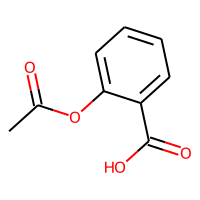
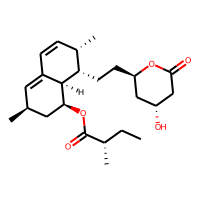
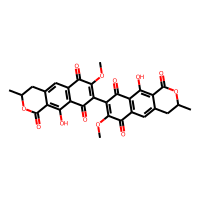

In [75]:
molset.annotate('C5.001', include_features=True, features_from_raw=True)
molset.df

## D level

### D1, Gene expression

L1000 from touchstone, feature mapping is dubious

[INFO    ] 1/4 molecules found in D1.001


,Name,InChIKey,InChI,SMILES,Structure,D1,D1_features
0,Aspirin,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,,0,[]
1,Hydrocortisone,JYGXADMDTFJGBT-VWUMJDOOSA-N,InChI=1S/C21H30O5/c1-19-7-5-13(23)9-12(19)3-4-...,C[C@]12C[C@H](O)[C@H]3[C@@H](CCC4=CC(=O)CC[C@@...,,1,"[1208, 1287, 1358, 27, 2939, 3422, 3515, 4761,..."
2,Lovastatin,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,,0,[]
3,Xanthomegnin,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,,0,[]

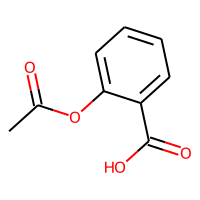
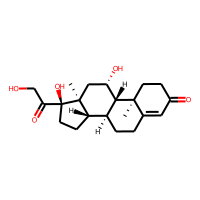
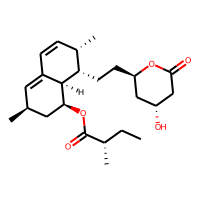
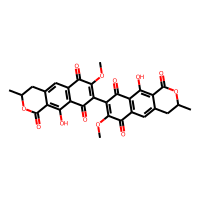

In [6]:
molset.annotate('D1.001', include_features=True, features_from_raw=True)
molset.df

### D2, Cancer cell lines

NCI60 cell lines, for additional information on the cell lines check https://discover.nci.nih.gov/cellminer/celllineMetadata.do

This is a continuous dataset so all possible features will be reported (useless without the values)

[INFO    ] 2/4 molecules found in D2.001


,Name,InChIKey,InChI,SMILES,Structure,D1,D1_features,D2,D2_features
0,Aspirin,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,,0,[],0,[]
1,Hydrocortisone,JYGXADMDTFJGBT-VWUMJDOOSA-N,InChI=1S/C21H30O5/c1-19-7-5-13(23)9-12(19)3-4-...,C[C@]12C[C@H](O)[C@H]3[C@@H](CCC4=CC(=O)CC[C@@...,,1,"[1208, 1287, 1358, 27, 2939, 3422, 3515, 4761,...",1,"[BR:MCF7, BR:HS 578T, BR:BT-549, BR:T-47D, CNS..."
2,Lovastatin,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,,0,[],1,"[BR:MCF7, BR:MDA-MB-231, BR:HS 578T, BR:BT-549..."
3,Xanthomegnin,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,,0,[],0,[]

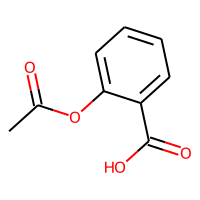
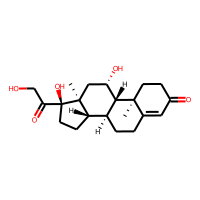
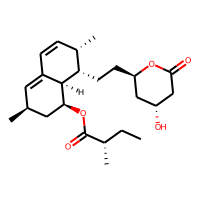
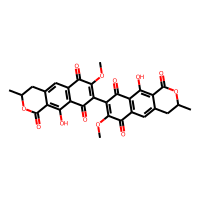

In [24]:
molset.annotate('D2.001', include_features=True, features_from_raw=True)
molset.df

### D3, Chemical genetics

http://mosaic.cs.umn.edu is not available, features are yeast strains, mapping is dubious


[INFO    ] 1/4 molecules found in D3.001


,Name,InChIKey,InChI,SMILES,Structure,D3,D3_features
0,Aspirin,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,,0,[]
1,Hydrocortisone,JYGXADMDTFJGBT-VWUMJDOOSA-N,InChI=1S/C21H30O5/c1-19-7-5-13(23)9-12(19)3-4-...,C[C@]12C[C@H](O)[C@H]3[C@@H](CCC4=CC(=O)CC[C@@...,,0,[]
2,Lovastatin,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,,1,"[YAR002W_sn1908, YBL006C_sn699, YBL097W_tsq510..."
3,Xanthomegnin,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,,0,[]

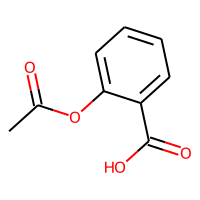
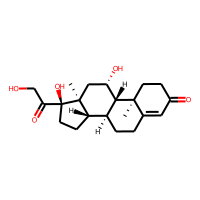
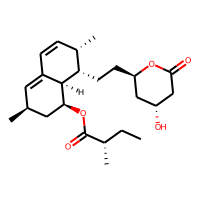
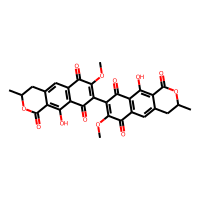

In [7]:
molset.annotate('D3.001', include_features=True, features_from_raw=True)
molset.df

In [27]:
len(molset.df.iloc[2]['D3_features'])

95

### D4, Morphology

LDS-1195 dataset

This is a continuous dataset so all possible features will be reported (useless without the values)

[INFO    ] 1/4 molecules found in D4.001


,Name,InChIKey,InChI,SMILES,Structure,D3,D3_features,D4,D4_features
0,Aspirin,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,,0,[],0,[]
1,Hydrocortisone,JYGXADMDTFJGBT-VWUMJDOOSA-N,InChI=1S/C21H30O5/c1-19-7-5-13(23)9-12(19)3-4-...,C[C@]12C[C@H](O)[C@H]3[C@@H](CCC4=CC(=O)CC[C@@...,,0,[],0,[]
2,Lovastatin,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,,1,"[YAR002W_sn1908, YBL006C_sn699, YBL097W_tsq510...",1,"[Cells_AreaShape_Area, Cells_AreaShape_Compact..."
3,Xanthomegnin,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,,0,[],0,[]

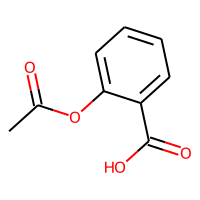
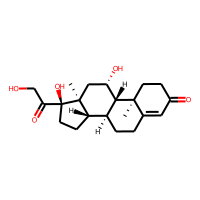
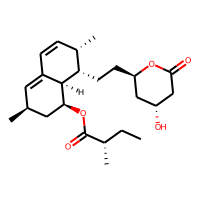
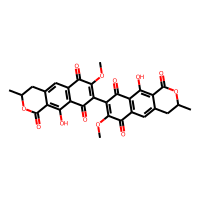

In [8]:
molset.annotate('D4.001', include_features=True, features_from_raw=True)
molset.df

### D5, Cell bioassays

cell bioassay data from ChEMBL, features are Cellosaurus ids

In [33]:
def get_cellosaurus(chebi_obo):
    """Get Cellosaurus id to name dictionary."""
    chebi_dict = defaultdict(str)
    f = open(chebi_obo, "r")
    terms = f.read().split("[Term]\n")
    for term in terms[1:]:
        term = term.split("\n")
        chebi_id = term[0].split("id: ")[1]
        chebi_name = term[1].split("name: ")[1]
        chebi_dict[chebi_id] = chebi_name
    f.close()
    return chebi_dict

cell_dict = get_cellosaurus('./cellosaurus.obo')

[INFO    ] 1/4 molecules found in D5.001


,Name,InChIKey,InChI,SMILES,Structure,D3,D3_features,D4,D4_features,D5,D5_features
0,Aspirin,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,,0,[],0,[],0,[]
1,Hydrocortisone,JYGXADMDTFJGBT-VWUMJDOOSA-N,InChI=1S/C21H30O5/c1-19-7-5-13(23)9-12(19)3-4-...,C[C@]12C[C@H](O)[C@H]3[C@@H](CCC4=CC(=O)CC[C@@...,,0,[],0,[],0,[]
2,Lovastatin,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,,1,"[YAR002W_sn1908, YBL006C_sn699, YBL097W_tsq510...",1,"[Cells_AreaShape_Area, Cells_AreaShape_Compact...",1,[CVCL_0027]
3,Xanthomegnin,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,,0,[],0,[],0,[]

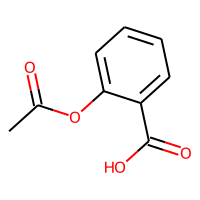
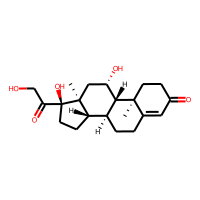
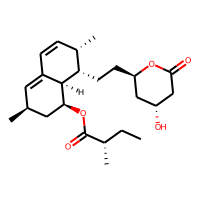
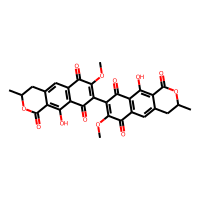

In [35]:
molset.annotate('D5.001', include_features=True, features_from_raw=True)
molset.df

[INFO    ] 1/4 molecules found in D5.001


,Name,InChIKey,InChI,SMILES,Structure,D3,D3_features,D4,D4_features,D5,D5_features
0,Aspirin,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,,0,[],0,[],0,[]
1,Hydrocortisone,JYGXADMDTFJGBT-VWUMJDOOSA-N,InChI=1S/C21H30O5/c1-19-7-5-13(23)9-12(19)3-4-...,C[C@]12C[C@H](O)[C@H]3[C@@H](CCC4=CC(=O)CC[C@@...,,0,[],0,[],0,[]
2,Lovastatin,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,,1,"[YAR002W_sn1908, YBL006C_sn699, YBL097W_tsq510...",1,"[Cells_AreaShape_Area, Cells_AreaShape_Compact...",1,[Hep-G2]
3,Xanthomegnin,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,,0,[],0,[],0,[]

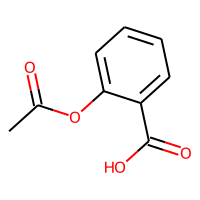
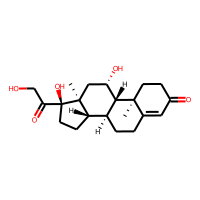
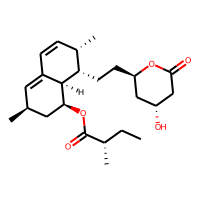
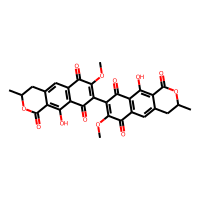

In [36]:
molset.annotate('D5.001', include_features=True, features_from_raw=True, feature_map=cell_dict)
molset.df

## E level

### E1, Therapeutic areas

ATC classification system codes from KEGG

In [33]:
def get_kegg_atc(kegg_br):
    """Get Kegg ATC id to name dictionary."""
    atc_dict = defaultdict(str)
    fh = open(kegg_br, "r")
    for line in fh.readlines():
        level = line[0]
        if level not in ['A','B','C','D','E']:
            continue
        line = line[1:].strip()
        split_idx = line.find(' ')
        atc_dict['%s:%s' % (level, line[:split_idx])] = line[split_idx:].strip()
    fh.close()
    return atc_dict

atc_dict = get_kegg_atc('./br08303.keg')

[INFO    ] 2/3 molecules found in E1.001


,Name,InChIKey,InChI,SMILES,Structure,B4,B4_features,B4_target,B4_target_classes,B4_target_classes_name,E1,E1_features
0,Aspirin,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,,1,"[Class:1, Class:10, Class:645, O62664, P05979,...","[O62664, P05979, P23219, P35354, P79208, Q6XQN6]","[Class:1, Class:10, Class:645]","[Enzyme, Oxidoreductase, Ligase]",1,"[A:A, A:B, A:C, A:M, A:N, B:A01, B:B01, B:C10,..."
1,Lovastatin,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,,1,"[Class:1, Class:10, Class:1006, Class:1027, Cl...","[O42275, P04035, P08183, P23975, P51639, P8190...","[Class:1, Class:10, Class:1006, Class:1027, Cl...","[Enzyme, Oxidoreductase, Transporter, Primary ...",1,"[A:C, B:C10, C:C10A, C:C10B, D:C10AA, D:C10BA,..."
2,Xanthomegnin,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,,0,[],[],[],[],0,[]

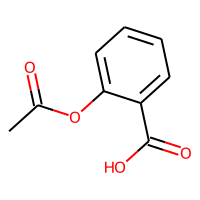
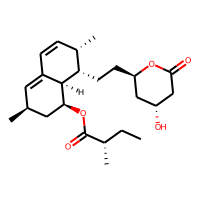
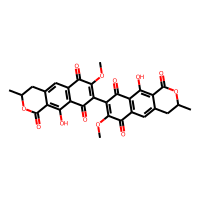

In [34]:
molset.annotate('E1.001', include_features=True, features_from_raw=True)
molset.df

In [35]:
molset.df.iloc[0]['E1_features']

['A:A',
 'A:B',
 'A:C',
 'A:M',
 'A:N',
 'B:A01',
 'B:B01',
 'B:C10',
 'B:M01',
 'B:N02',
 'C:A01A',
 'C:B01A',
 'C:C10B',
 'C:M01B',
 'C:N02B',
 'D:A01AD',
 'D:B01AC',
 'D:C10BX',
 'D:M01BA',
 'D:N02BA',
 'E:A01AD05',
 'E:B01AC06',
 'E:B01AC56',
 'E:C10BX01',
 'E:C10BX02',
 'E:C10BX04',
 'E:C10BX05',
 'E:C10BX06',
 'E:C10BX08',
 'E:M01BA03',
 'E:N02BA01',
 'E:N02BA51',
 'E:N02BA71']

[INFO    ] 2/3 molecules found in E1.001


,Name,InChIKey,InChI,SMILES,Structure,B4,B4_features,B4_target,B4_target_classes,B4_target_classes_name,E1,E1_features
0,Aspirin,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,,1,"[Class:1, Class:10, Class:645, O62664, P05979,...","[O62664, P05979, P23219, P35354, P79208, Q6XQN6]","[Class:1, Class:10, Class:645]","[Enzyme, Oxidoreductase, Ligase]",1,"[ALIMENTARY TRACT AND METABOLISM, BLOOD AND BL..."
1,Lovastatin,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,,1,"[Class:1, Class:10, Class:1006, Class:1027, Cl...","[O42275, P04035, P08183, P23975, P51639, P8190...","[Class:1, Class:10, Class:1006, Class:1027, Cl...","[Enzyme, Oxidoreductase, Transporter, Primary ...",1,"[CARDIOVASCULAR SYSTEM, LIPID MODIFYING AGENTS..."
2,Xanthomegnin,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,,0,[],[],[],[],0,[]

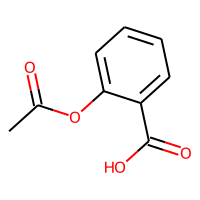
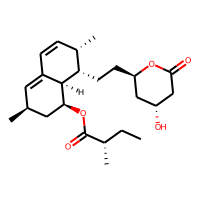
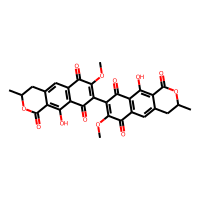

In [36]:
molset.annotate('E1.001', include_features=True, features_from_raw=True, feature_map=atc_dict)
molset.df

In [37]:
molset.df.iloc[0]['E1_features']

['ALIMENTARY TRACT AND METABOLISM',
 'BLOOD AND BLOOD FORMING ORGANS',
 'CARDIOVASCULAR SYSTEM',
 'MUSCULO-SKELETAL SYSTEM',
 'NERVOUS SYSTEM',
 'STOMATOLOGICAL PREPARATIONS',
 'ANTITHROMBOTIC AGENTS',
 'LIPID MODIFYING AGENTS',
 'ANTIINFLAMMATORY AND ANTIRHEUMATIC PRODUCTS',
 'ANALGESICS',
 'STOMATOLOGICAL PREPARATIONS',
 'ANTITHROMBOTIC AGENTS',
 'LIPID MODIFYING AGENTS, COMBINATIONS',
 'ANTIINFLAMMATORY/ANTIRHEUMATIC AGENTS IN COMBINATION',
 'OTHER ANALGESICS AND ANTIPYRETICS',
 'Other agents for local oral treatment',
 'Platelet aggregation inhibitors excl. heparin',
 'Lipid modifying agents in combination with other drugs',
 'Antiinflammatory/antirheumatic agents in combination with corticosteroids',
 'Salicylic acid and derivatives',
 'Acetylsalicylic acid [DG:DG00015]',
 'Acetylsalicylic acid [DG:DG00015]',
 'Acetylsalicylic acid, combinations with proton pump inhibitors',
 'Simvastatin and acetylsalicylic acid',
 'Pravastatin and acetylsalicylic acid',
 'Simvastatin, acetylsali

### E2, Indications
E2 is MESH indication combined with the clinical phase (0-4)

In [ ]:
def get_mesh(ctd_disease):
    """Get MESH id to name dictionary."""
    mesh_dict = defaultdict(str)
    with open(ctd_disease, "r") as f:
        for l in f:
            if l[0] == "#":
                continue
            l = l.rstrip("\n").split("\t")
            dis_id = l[1].split(':')[1]
            dis_name = l[0]
            mesh_dict[dis_id] = dis_name
            mesh_dict[dis_id + '(0)'] = dis_name + ' (phase 0)'
            mesh_dict[dis_id + '(1)'] = dis_name + ' (phase I)'
            mesh_dict[dis_id + '(2)'] = dis_name + ' (phase II)'
            mesh_dict[dis_id + '(3)'] = dis_name + ' (phase III)'
            mesh_dict[dis_id + '(4)'] = dis_name + ' (phase IV)'
    return mesh_dict

mesh_dict = get_mesh('./CTD_diseases.tsv')

[INFO    ] 2/3 molecules found in E2.001


,Name,InChIKey,InChI,SMILES,Structure,B4,B4_features,B4_target,B4_target_classes,B4_target_classes_name,E1,E1_features,E2,E2_features
0,Aspirin,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,,1,"[Class:1, Class:10, Class:645, O62664, P05979,...","[O62664, P05979, P23219, P35354, P79208, Q6XQN6]","[Class:1, Class:10, Class:645]","[Enzyme, Oxidoreductase, Ligase]",1,"[ALIMENTARY TRACT AND METABOLISM, BLOOD AND BL...",1,"[Diseases (phase IV), Abortion, Spontaneous (p..."
1,Lovastatin,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,,1,"[Class:1, Class:10, Class:1006, Class:1027, Cl...","[O42275, P04035, P08183, P23975, P51639, P8190...","[Class:1, Class:10, Class:1006, Class:1027, Cl...","[Enzyme, Oxidoreductase, Transporter, Primary ...",1,"[CARDIOVASCULAR SYSTEM, LIPID MODIFYING AGENTS...",1,"[Diseases (phase IV), Congenital Abnormalities..."
2,Xanthomegnin,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,,0,[],[],[],[],0,[],0,[]

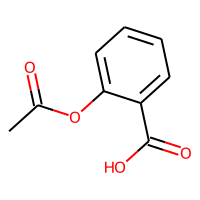
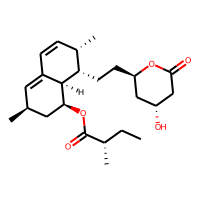
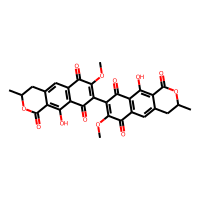

In [57]:
molset.annotate('E2.001', include_features=True, features_from_raw=True, feature_map=mesh_dict)
molset.df

### E3, Side effects

Side effects from sider

In [70]:
def get_side(sider):
    """Get side effect id to name dictionary."""
    side_dict = defaultdict(str)
    with open(sider, "r") as f:
        for l in f:
            l = l.rstrip("\n").split("\t")
            try:
                side_id = l[2]
                side_name = l[5]
                side_dict[side_id] = side_name
            except Exception:
                print(l)
    return side_dict

side_dict = get_side('./meddra_all_se.tsv')

[INFO    ] 1/3 molecules found in E3.001


,Name,InChIKey,InChI,SMILES,Structure,B4,B4_features,B4_target,B4_target_classes,B4_target_classes_name,E1,E1_features,E2,E2_features,E3,E3_features
0,Aspirin,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,,1,"[Class:1, Class:10, Class:645, O62664, P05979,...","[O62664, P05979, P23219, P35354, P79208, Q6XQN6]","[Class:1, Class:10, Class:645]","[Enzyme, Oxidoreductase, Ligase]",1,"[ALIMENTARY TRACT AND METABOLISM, BLOOD AND BL...",1,"[Diseases (phase IV), Abortion, Spontaneous (p...",1,"[Respiratory alkalosis, Anaphylactic shock, An..."
1,Lovastatin,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,,1,"[Class:1, Class:10, Class:1006, Class:1027, Cl...","[O42275, P04035, P08183, P23975, P51639, P8190...","[Class:1, Class:10, Class:1006, Class:1027, Cl...","[Enzyme, Oxidoreductase, Transporter, Primary ...",1,"[CARDIOVASCULAR SYSTEM, LIPID MODIFYING AGENTS...",1,"[Diseases (phase IV), Congenital Abnormalities...",0,[]
2,Xanthomegnin,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,,0,[],[],[],[],0,[],0,[],0,[]

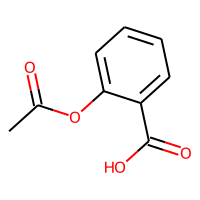
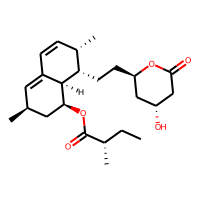
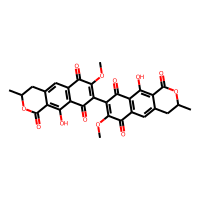

In [72]:
molset.annotate('E3.001', include_features=True, features_from_raw=True, feature_map=side_dict)
molset.df

In [73]:
molset.df.iloc[0]['E3_features']

['Respiratory alkalosis',
 'Anaphylactic shock',
 'Anaemia',
 'Angioedema',
 'Asthma',
 'Coagulopathy',
 'Breast feeding',
 'Varicella',
 'Coma',
 'Feeling abnormal',
 'Contusion',
 'Diabetes mellitus',
 'Diarrhoea',
 'Polyuria',
 'Somnolence',
 'Dyspepsia',
 'Dyspnoea',
 'Dermatitis',
 'Flushing',
 'Gastrointestinal haemorrhage',
 'Gout',
 'Dyspepsia',
 'Haematemesis',
 'Haemoglobin',
 'Haemorrhagic disorder',
 'Hypersensitivity',
 'Hypertension',
 'Hypoglycaemia',
 'Hypokalaemia',
 'Leukopenia',
 'Foetor hepaticus',
 'Melaena',
 'Nausea',
 'Peptic ulcer',
 'Pruritus',
 'Purpura',
 "Reye's syndrome",
 'Convulsion',
 'Hyperhidrosis',
 'Syncope',
 'Tachycardia',
 'Thirst',
 'Thrombocytopenia',
 'Tinnitus',
 'Ulcer',
 'Urticaria',
 'Vertigo',
 'Vomiting',
 'Renal impairment',
 'Dizziness',
 'Metabolic acidosis',
 'Agitation',
 'Tinnitus',
 'Hepatotoxicity',
 'Chest discomfort',
 'Diabetes mellitus',
 'Acidosis',
 'Rash',
 'Epigastric discomfort',
 'Arthralgia',
 'Influenza',
 'Respirator

### E4, Disease phenotypes

Comparative Toxicogenomics Database, compound-disease associations are classified as ‘therapeutic’ (T) or ‘marker/mechanism’ (M)

In [77]:
def get_ctd(ctd_disease):
    """Get CTD id to name dictionary."""
    mesh_dict = defaultdict(str)
    with open(ctd_disease, "r") as f:
        for l in f:
            if l[0] == "#":
                continue
            l = l.rstrip("\n").split("\t")
            dis_id = l[1].split(':')[1]
            dis_name = l[0]
            mesh_dict[dis_id] = dis_name
            mesh_dict[dis_id + '(T)'] = dis_name + ' (therapeutic)'
            mesh_dict[dis_id + '(M)'] = dis_name + ' (marker)'
    return mesh_dict

ctd_dict = get_ctd('./CTD_diseases.tsv')

[INFO    ] 1/3 molecules found in E4.001


,Name,InChIKey,InChI,SMILES,Structure,B4,B4_features,B4_target,B4_target_classes,B4_target_classes_name,E1,E1_features,E2,E2_features,E3,E3_features,E4,E4_features
0,Aspirin,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,,1,"[Class:1, Class:10, Class:645, O62664, P05979,...","[O62664, P05979, P23219, P35354, P79208, Q6XQN6]","[Class:1, Class:10, Class:645]","[Enzyme, Oxidoreductase, Ligase]",1,"[ALIMENTARY TRACT AND METABOLISM, BLOOD AND BL...",1,"[Diseases (phase IV), Abortion, Spontaneous (p...",1,"[Respiratory alkalosis, Anaphylactic shock, An...",1,"[C536392(M), C536421(M), C537996(M), C565935(M..."
1,Lovastatin,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,,1,"[Class:1, Class:10, Class:1006, Class:1027, Cl...","[O42275, P04035, P08183, P23975, P51639, P8190...","[Class:1, Class:10, Class:1006, Class:1027, Cl...","[Enzyme, Oxidoreductase, Transporter, Primary ...",1,"[CARDIOVASCULAR SYSTEM, LIPID MODIFYING AGENTS...",1,"[Diseases (phase IV), Congenital Abnormalities...",0,[],0,[]
2,Xanthomegnin,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,,0,[],[],[],[],0,[],0,[],0,[],0,[]

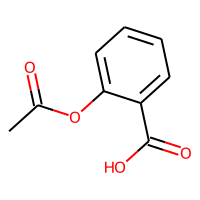
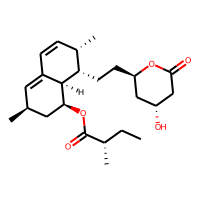
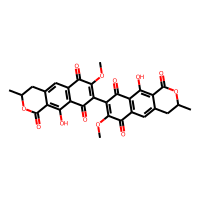

In [78]:
molset.annotate('E4.001', include_features=True, features_from_raw=True)
molset.df

In [79]:
molset.df.iloc[0]['E4_features']

['C536392(M)',
 'C536421(M)',
 'C537996(M)',
 'C565935(M)',
 'D000013(M)',
 'D000014(M)',
 'D000073618(T)',
 'D000080874(T)',
 'D000082122(M)',
 'D000083242(T)',
 'D000083302(M)',
 'D000137(M)',
 'D000138(M)',
 'D000160(M)',
 'D000230(M)',
 'D000236(T)',
 'D000307(T)',
 'D000308(T)',
 'D000380(M)',
 'D000471(M)',
 'D000472(M)',
 'D000690(T)',
 'D000707(M)',
 'D000740(M)',
 'D000743(M)',
 'D000748(M)',
 'D000783(T)',
 'D000784(T)',
 'D000787(M)',
 'D000787(T)',
 'D000788(M)',
 'D000789(M)',
 'D000789(T)',
 'D000799(M)',
 'D000855(M)',
 'D000868(M)',
 'D001002(M)',
 'D001017(M)',
 'D001024(M)',
 'D001028(M)',
 'D001049(M)',
 'D001145(M)',
 'D001145(T)',
 'D001157(T)',
 'D001161(T)',
 'D001168(T)',
 'D001170(T)',
 'D001171(T)',
 'D001172(T)',
 'D001249(M)',
 'D001254(T)',
 'D001259(M)',
 'D001281(T)',
 'D001284(M)',
 'D001327(T)',
 'D001416(T)',
 'D001423(T)',
 'D001424(T)',
 'D001477(T)',
 'D001480(M)',
 'D001523(M)',
 'D001523(T)',
 'D001649(M)',
 'D001660(M)',
 'D001745(T)',
 'D001749(

[INFO    ] 1/3 molecules found in E4.001


,Name,InChIKey,InChI,SMILES,Structure,B4,B4_features,B4_target,B4_target_classes,B4_target_classes_name,E1,E1_features,E2,E2_features,E3,E3_features,E4,E4_features
0,Aspirin,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,,1,"[Class:1, Class:10, Class:645, O62664, P05979,...","[O62664, P05979, P23219, P35354, P79208, Q6XQN6]","[Class:1, Class:10, Class:645]","[Enzyme, Oxidoreductase, Ligase]",1,"[ALIMENTARY TRACT AND METABOLISM, BLOOD AND BL...",1,"[Diseases (phase IV), Abortion, Spontaneous (p...",1,"[Respiratory alkalosis, Anaphylactic shock, An...",1,"[Factor 8 deficiency, acquired (marker), Prinz..."
1,Lovastatin,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,,1,"[Class:1, Class:10, Class:1006, Class:1027, Cl...","[O42275, P04035, P08183, P23975, P51639, P8190...","[Class:1, Class:10, Class:1006, Class:1027, Cl...","[Enzyme, Oxidoreductase, Transporter, Primary ...",1,"[CARDIOVASCULAR SYSTEM, LIPID MODIFYING AGENTS...",1,"[Diseases (phase IV), Congenital Abnormalities...",0,[],0,[]
2,Xanthomegnin,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,,0,[],[],[],[],0,[],0,[],0,[],0,[]

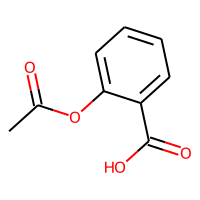
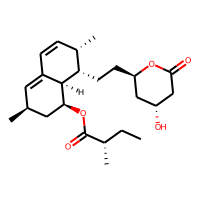
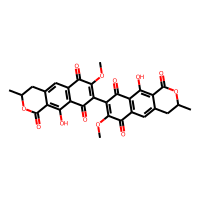

In [80]:
molset.annotate('E4.001', include_features=True, features_from_raw=True, feature_map=ctd_dict)
molset.df

In [81]:
molset.df.iloc[0]['E4_features']

['Factor 8 deficiency, acquired (marker)',
 "Prinzmetal's variant angina (marker)",
 'Dysgnathia complex (marker)',
 'Asthma, Nasal Polyps, And Aspirin Intolerance (marker)',
 'Congenital Abnormalities (marker)',
 'Abnormalities, Drug-Induced (marker)',
 'Varicella Zoster Virus Infection (therapeutic)',
 'Synucleinopathies (therapeutic)',
 'Internal Hernia (marker)',
 'Ischemic Stroke (therapeutic)',
 'Hemorrhagic Stroke (marker)',
 'Acid-Base Imbalance (marker)',
 'Acidosis (marker)',
 'Vestibulocochlear Nerve Diseases (marker)',
 'Adenocarcinoma (marker)',
 'Adenoma (therapeutic)',
 'Adrenal Gland Diseases (therapeutic)',
 'Adrenocortical Hyperfunction (therapeutic)',
 'Agranulocytosis (marker)',
 'Alkalosis (marker)',
 'Alkalosis, Respiratory (marker)',
 'Amyotrophic Lateral Sclerosis (therapeutic)',
 'Anaphylaxis (marker)',
 'Anemia (marker)',
 'Anemia, Hemolytic (marker)',
 'Anemia, Macrocytic (marker)',
 'Aneurysm (therapeutic)',
 'Aneurysm, Dissecting (therapeutic)',
 'Angina Pe

### E5, Drug-drug interaction

from drugbank, we can map drugbank code to inchikey

In [94]:
def get_drugbank(drugbank_struct):
    """Get DrugBank id to inchikey dictionary."""
    df = pd.read_csv(drugbank_struct)
    drugbank_dict = defaultdict(lambda: None)
    drugbank_dict.update(dict(zip(df['DrugBank ID'],df['InChIKey'])))
    return drugbank_dict

drugbank_dict = get_drugbank('./structure links.csv')

[INFO    ] 2/3 molecules found in E5.001


,Name,InChIKey,InChI,SMILES,Structure,B4,B4_features,B4_target,B4_target_classes,B4_target_classes_name,E1,E1_features,E2,E2_features,E3,E3_features,E4,E4_features,E5,E5_features
0,Aspirin,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)...,CC(=O)Oc1ccccc1C(=O)O,,1,"[Class:1, Class:10, Class:645, O62664, P05979,...","[O62664, P05979, P23219, P35354, P79208, Q6XQN6]","[Class:1, Class:10, Class:645]","[Enzyme, Oxidoreductase, Ligase]",1,"[ALIMENTARY TRACT AND METABOLISM, BLOOD AND BL...",1,"[Diseases (phase IV), Abortion, Spontaneous (p...",1,"[Respiratory alkalosis, Anaphylactic shock, An...",1,"[Factor 8 deficiency, acquired (marker), Prinz...",1,"[OIRCOABEOLEUMC-GEJPAHFPSA-N, NFLWUMRGJYTJIN-P..."
1,Lovastatin,PCZOHLXUXFIOCF-BXMDZJJMSA-N,InChI=1S/C24H36O5/c1-5-15(3)24(27)29-21-11-14(...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,,1,"[Class:1, Class:10, Class:1006, Class:1027, Cl...","[O42275, P04035, P08183, P23975, P51639, P8190...","[Class:1, Class:10, Class:1006, Class:1027, Cl...","[Enzyme, Oxidoreductase, Transporter, Primary ...",1,"[CARDIOVASCULAR SYSTEM, LIPID MODIFYING AGENTS...",1,"[Diseases (phase IV), Congenital Abnormalities...",0,[],0,[],1,"[OIRCOABEOLEUMC-GEJPAHFPSA-N, DOAKLVKFURWEDJ-Q..."
2,Xanthomegnin,WICHONPZVIYWIJ-UHFFFAOYSA-N,InChI=1S/C30H22O12/c1-9-5-11-7-13-17(23(33)15(...,COC1=C(C2=C(OC)C(=O)c3c(C2=O)c(O)c2C(=O)OC(C)C...,,0,[],[],[],[],0,[],0,[],0,[],0,[],0,[]

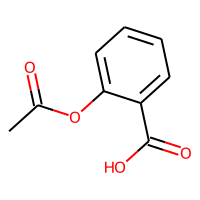
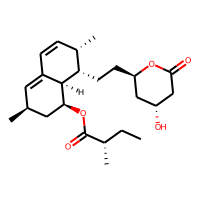
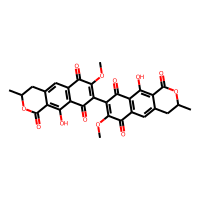

In [95]:
molset.annotate('E5.001', include_features=True, features_from_raw=True, feature_map=drugbank_dict)
molset.df